<a href="https://colab.research.google.com/github/HaroldSthid/UDistrital_DS_StudyCase24-2/blob/main/caso_inmobiliaria.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Steps para desarrollar un caso de estudio en ciencias de datos aplicada

Mapeo data sets en csv a Sqlite

In [ ]:
!pip install fuzzywuzzy

In [ ]:
import sqlite3
from fuzzywuzzy import fuzz, process

/usr/local/lib/python3.10/dist-packages/fuzzywuzzy/fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


In [3]:
from google.colab import drive
import pandas as pd

In [4]:
# Monta Google Drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


###Subir la Base de Datos a Google Drive:

*   Accede a tu Google Drive: Ve a drive.google.com.
*   Crea una carpeta: Crea una carpeta nueva dentro de tu Google Drive para guardar la base de datos.
be el archivo: Arrastra y suelta el archivo de tu base de datos SQLite (.db) dentro de la carpeta que creaste





In [5]:
ruta_base_de_datos = '/content/drive/MyDrive/UDistrital/CasoInmobiliaria/db_casoInmobiliaria_DS_course.db'

#Conectar a la base de datos: Ahora puedes usar el código para conectar a la base de datos, pero reemplazando la ruta del archivo por ruta_base_de_datos:

###Recomendaciones:

*   Crear un script de ingesta: Te recomiendo que crees un script de Python (por
ejemplo, ingesta_datos.py) que realice la conexión a la base de datos, las consultas y la carga de datos a un DataFrame de pandas. Así podrás ejecutar este script fácilmente cada vez que necesites actualizar tus datos.
*   Gestionar los permisos: Asegúrate de configurar los permisos de acceso a tu carpeta de Google Drive de manera que solo las personas autorizadas puedan acceder a la base de datos.
*   Versiones de la base de datos: Si necesitas realizar cambios en la estructura de la base de datos, considera crear copias de seguridad con diferentes nombres para no perder información.

In [ ]:
# Conectar a la base de datos
conn = sqlite3.connect("/content/drive/MyDrive/UDistrital/CasoInmobiliaria/db_casoInmobiliaria_DS_course.db") #aqui repites la ruta donde esta el archivo en tu Repo ''Google drive''

# Crear un cursor para ejecutar consultas SQL
cursor = conn.cursor()

# Consultar datos de la base de datos (ejemplo)
cursor.execute("SELECT * FROM db_temp_Azure_vw_CLIENTES LIMIT 10")

# Obtener los resultados de la consulta
datos = cursor.fetchall()

# Imprimir los datos de la consulta
print("Resultados de la consulta:")
for fila in datos:
    print(fila)

# Cerrar la conexión
conn.close()

Resultados de la consulta:
(177595, 23400, '01/02/2017 11:48', 'Jhon Pablo', 'Pacheco Gonzalez', 'jpache75@hotmail.com', '@hotmail.com', None, 'Colombia', 'Bogotá D.C.', None, 'Cll. 150A # 45-65 Apto 204 Edificio Australia', 'Victoria Norte', None, 'SIN_PROYECTO', None, '6267580', '3155453409', '3107813339 - 3157724835', '03/03/2014 14:53', 'Proyecto: DELTA PARK  Medio por el cual se entero de nosotros: por un hermano  Observaciones : Estoy interesado para invertir en el proyecto, agradecería que por favor se comuniquen conmigo para obtener mayor información.  Gracias', 'Delta Park', None, None, None, 'Referido Familiar', None, None, 'Edinson', 2, 350095300.0, '201095300', '149000000', 'Referido / Buen vecino,Fidelización / Club de inversión ,NUEVA MARCA,Boletín Delta,Premio Cliente 2015,CELEBRAMOS TU INVERSIÓN,TEMÁTICA DEL MES,DEHESA PARK', '24/01/2014', None, None, None, 'LEER', 'Casado (a)', None, '88213488 DE CUCUTA', None, '3202753871 RONALDO PACHECO (HRNO', '3112643980 NELSON PAC

#Conuslta usando SQL  para validar que la ingesta este funcionando bien y poder definir tareas de transformacion de datos.

In [ ]:
# Conectar a la base de datos
conn = sqlite3.connect("/content/drive/MyDrive/UDistrital/CasoInmobiliaria/db_casoInmobiliaria_DS_course.db") #aqui repites la ruta donde esta el archivo en tu Repo ''Google drive''

# Crear un cursor para ejecutar consultas SQL
cursor = conn.cursor()

df = pd.read_sql_query("""
    SELECT ORIGEN, COUNT(*) AS numero_clientes
    FROM db_temp_Azure_vw_CLIENTES
    WHERE TOTALMONTOVENDIDO >= 350095300.000
    GROUP BY ORIGEN
    ORDER BY numero_clientes DESC
""", conn)
print(df)

                   ORIGEN  numero_clientes
0            SIN_PROYECTO               33
1         C.N. DELTA PARK               31
2        C.N. SILVER PARK               19
3        C.V. DEHESA PARK               13
4  C.N. TORRES DEL BOSQUE                9
5              C.N. PRAGA                8
6         C.N. BLUE TOWER                8
7           EDIFICIO ONIX                7


##Ahora vamos a trabajar con Data Frames para inicar el proceso de transformaciones

#Descripcion Steps

##1.Conexión a la base de datos: Se establece la conexión a la base de datos SQLite usando sqlite3.connect().
##2.Leer la tabla en un DataFrame: Se usa pd.read_sql_query() para leer la tabla db_temp_Azure_vw_CLIENTES en un DataFrame de pandas llamado df.

##3.Crear la variable 'Outlier':
*   Se utiliza la lógica de las reglas proporcionadas para crear la variable 'Outlier'.
*   Se usan operadores lógicos (& para AND, | para OR) para combinar las condiciones.
*  Se asigna el nombre de 'Outlier' correspondiente a la columna 'Outlier' de las filas que cumplen la condición.

##4.Actualizar la tabla en la base de datos:
*   Se usa df.to_sql() para actualizar la tabla db_temp_Azure_vw_CLIENTES en la base de datos SQLite con el DataFrame actualizado.
*   Se usa if_exists='replace' para reemplazar la tabla existente si ya existe.
Cerrar la conexión: Se cierra la conexión a la base de datos.

###Consejos adicionales:

*   Comprueba la lógica de las reglas: Asegúrate de que las condiciones de las reglas se ajusten correctamente a lo que necesitas para la variable 'Outlier'.
*   Comprueba los tipos de datos: Verifica que los tipos de datos de las columnas ORIGEN y TOTALMONTOVENDIDO sean compatibles con las operaciones de comparación en las reglas.
*   Realiza pruebas: Después de actualizar la base de datos, verifica que la variable 'Outlier' se haya creado correctamente consultando la tabla en SQLiteStudio o ejecutando una consulta en Google Colab.

In [ ]:
# Conectar a la base de datos
conn = sqlite3.connect("/content/drive/MyDrive/UDistrital/CasoInmobiliaria/db_casoInmobiliaria_DS_course.db") #aqui repites la ruta donde esta el archivo en tu Repo ''Google drive''

# Leer la tabla 'db_temp_Azure_vw_CLIENTES' en un DataFrame
df = pd.read_sql_query("SELECT * FROM db_temp_Azure_vw_CLIENTES", conn)

# Convertir 'TOTALMONTOVENDIDO' a tipo numérico (int o float)
df['TOTALMONTOVENDIDO'] = pd.to_numeric(df['TOTALMONTOVENDIDO'], errors='coerce')

# Crear la variable 'Outlier' con nombres específicos
df['Outlier'] = None  # Inicializa la columna 'Outlier' con None

# Reglas para 'Outlier'
df.loc[((df['ORIGEN'] == 'C.V. DEHESA PARK') & ((df['TOTALMONTOVENDIDO'] >= 287013418) | (df['TOTALMONTOVENDIDO'] <= 189227368))), 'Outlier'] = 'Outlier Dehesa Park'
df.loc[((df['ORIGEN'] == 'C.N. BLUE TOWER') & ((df['TOTALMONTOVENDIDO'] >= 554887531) | (df['TOTALMONTOVENDIDO'] <= 0))), 'Outlier'] = 'Outlier Blue Tower'
df.loc[((df['ORIGEN'] == 'C.N. DELTA PARK') & ((df['TOTALMONTOVENDIDO'] >= 280314098) | (df['TOTALMONTOVENDIDO'] <= 134153198))), 'Outlier'] = 'Outlier Delta Park'
df.loc[((df['ORIGEN'] == 'EDIFICIO ONIX') & ((df['TOTALMONTOVENDIDO'] >= 454596397) | (df['TOTALMONTOVENDIDO'] <= 0))), 'Outlier'] = 'Outlier Onix'
df.loc[((df['ORIGEN'] == 'C.N. PRAGA') & ((df['TOTALMONTOVENDIDO'] >= 291154525) | (df['TOTALMONTOVENDIDO'] <= 179792177))), 'Outlier'] = 'Outlier Praga Park'
df.loc[((df['ORIGEN'] == 'C.N. SILVER PARK') & ((df['TOTALMONTOVENDIDO'] >= 254786630) | (df['TOTALMONTOVENDIDO'] <= 144718880))), 'Outlier'] = 'Outlier Silver Park'
df.loc[((df['ORIGEN'] == 'C.N. TORRES DEL BOSQUE') & ((df['TOTALMONTOVENDIDO'] >= 134333448) | (df['TOTALMONTOVENDIDO'] <= 92000000))), 'Outlier'] = 'Outlier Torres del Bosque'

# Remplazar valores NULL o vacíos por 'default'
df['Outlier'] = df['Outlier'].fillna('default')

# Actualizar la tabla en la base de datos SQLite
df.to_sql('db_temp_Azure_vw_CLIENTES', conn, if_exists='replace', index=False)

# Cerrar la conexión
conn.close()

print("Tabla actualizada con la variable 'Outlier' con nombres específicos y valores 'default' para los vacíos.")

Tabla actualizada con la variable 'Outlier' con nombres específicos y valores 'default' para los vacíos.


In [ ]:
# Conectar a la base de datos
conn = sqlite3.connect("/content/drive/MyDrive/UDistrital/CasoInmobiliaria/db_casoInmobiliaria_DS_course.db") #aqui repites la ruta donde esta el archivo en tu Repo ''Google drive''

# Crear un cursor para ejecutar consultas SQL
cursor = conn.cursor()

df = pd.read_sql_query("""
     SELECT
        ORIGEN,
        TOTALMONTOVENDIDO,
        Outlier,
        COUNT(*) AS numero_clientes
    FROM
        db_temp_Azure_vw_CLIENTES
    WHERE
        ORIGEN = 'C.V. DEHESA PARK' OR ORIGEN = 'C.N. BLUE TOWER' OR ORIGEN = 'C.N. DELTA PARK' OR ORIGEN = 'EDIFICIO ONIX' OR ORIGEN = 'C.N. PRAGA' OR ORIGEN = 'C.N. SILVER PARK' OR ORIGEN = 'C.N. TORRES DEL BOSQUE'  -- Puedes cambiar por otro origen si lo deseas
    GROUP BY
        Outlier
    ORDER BY
        numero_clientes DESC
""", conn)
print(df)

                   ORIGEN  TOTALMONTOVENDIDO                    Outlier  \
0           EDIFICIO ONIX        226000000.0                    default   
1  C.N. TORRES DEL BOSQUE                0.0  Outlier Torres del Bosque   
2         C.N. DELTA PARK        294000000.0         Outlier Delta Park   
3        C.N. SILVER PARK         99000000.0        Outlier Silver Park   
4           EDIFICIO ONIX                0.0               Outlier Onix   
5        C.V. DEHESA PARK                0.0        Outlier Dehesa Park   
6              C.N. PRAGA        175100000.0         Outlier Praga Park   

   numero_clientes  
0              636  
1               89  
2               73  
3               48  
4               33  
5               15  
6               13  



#FuzzyWuzzy es una biblioteca de Python que se utiliza para la coincidencia de cadenas de texto

1.   Conexión y lectura: Se conecta a la base de datos y se lee la tabla db_temp_Azure_vw_CLIENTES en un DataFrame.
2.   Definir etiquetas: Se define una lista etiquetas con las etiquetas predefinidas.
3.   Inicializar la variable: Se crea la variable CodeProyectoInteres en el DataFrame y se inicializa con None.
4.   Bucle iterativo: Se itera a través de cada fila del DataFrame (df.iterrows()).
5.   Combinar variables: Se combinan las variables ORIGEN, Proyecto_1, Proyecto_2, Proyecto_3 en una sola cadena de texto llamada texto.
6.   Buscar coincidencia: Se usa process.extractOne() de Fuzzy Wuzzy para buscar la mejor coincidencia entre texto y las etiquetas usando el método fuzz.token_set_ratio().
7.   Asignar la coincidencia: El valor de la mejor coincidencia (nombre de la etiqueta) se asigna a la columna CodeProyectoInteres de la fila actual.
8.   Actualizar la tabla: Se actualiza la tabla en la base de datos SQLite.
Cerrar la conexión: Se cierra la conexión a la base de datos.

In [ ]:
# Conectar a la base de datos
conn = sqlite3.connect("/content/drive/MyDrive/UDistrital/CasoInmobiliaria/db_casoInmobiliaria_DS_course.db") #aqui repites la ruta donde esta el archivo en tu Repo ''Google drive''

# Leer la tabla 'db_temp_Azure_vw_CLIENTES' en un DataFrame
df = pd.read_sql_query("SELECT * FROM db_temp_Azure_vw_CLIENTES", conn)

# Definir las etiquetas predefinidas
etiquetas = ['Delta Park', 'Dehesa Park', 'Silver Park', 'Torres del bosque', 'Onix', 'Praga Park', 'Blue Tower']

# Crear la variable 'CodeProyectoInteres'
df['CodeProyectoInteres'] = None  # Inicializa la columna 'CodeProyectoInteres' con None

# Buscar coincidencias usando Fuzzy Wuzzy
for index, row in df.iterrows():
    # Combinar las variables de interés
    texto = ' '.join([str(row['ORIGEN']), str(row['Proyecto_1']), str(row['Proyecto_2']), str(row['Proyecto_3'])])
    # Buscar la mejor coincidencia usando Fuzzy Wuzzy
    mejor_coincidencia = process.extractOne(texto, etiquetas, scorer=fuzz.token_set_ratio)[0]
    # Asignar el valor de la mejor coincidencia a la variable 'CodeProyectoInteres'
    df.loc[index, 'CodeProyectoInteres'] = mejor_coincidencia

#Explicación:


1.   Conexión y lectura: Se conecta a la base de datos y se lee la tabla db_temp_Azure_vw_CLIENTES en un DataFrame.
2.   Función marca_de_clase: Se define una función para calcular la marca de clase a partir de una cadena de texto que representa el rango. Se han añadido condiciones para manejar rangos abiertos (ej. "Mas de 100 metros", "De 200 Millones en a") y valores especiales como "No especifica" o "Pendiente info".
3.   Crear nuevas variables: Se aplican las nuevas variables InteresMetraje_MarcaClase, Sueldo_MarcaClase y ApartamentoDesde_MarcaClase al DataFrame, usando la función marca_de_clase con apply para convertir los valores categóricos a valores numéricos.
4.   Actualizar la tabla: Se actualiza la tabla en la base de datos SQLite.
Cerrar la conexión: Se cierra la conexión a la base de datos.

##Recuerda:
*   Ajustar nombres de columnas: Asegúrate de que los nombres de las columnas InteresMetraje, Sueldo y ApartamentoDesde sean correctos.
*   Formato de rangos: Verifica que la función marca_de_clase se adapte correctamente a los formatos de tus rangos.
*   Verificar resultados: Revisa los datos después de la actualización para confirmar que las nuevas variables se han creado correctamente.

In [23]:
# Conectar a la base de datos
try:
    conn = sqlite3.connect("/content/drive/MyDrive/UDistrital/CasoInmobiliaria/db_casoInmobiliaria_DS_course.db")
    print("Conexión a la base de datos exitosa.")
except Exception as e:
    print(f"Error al conectar a la base de datos: {e}")
    raise

# Leer la tabla 'db_temp_Azure_vw_CLIENTES' en un DataFrame
try:
    df = pd.read_sql_query("SELECT * FROM db_temp_Azure_vw_CLIENTES", conn)
    print("Datos leídos exitosamente.")
except Exception as e:
    print(f"Error al leer la tabla: {e}")
    conn.close()
    raise

# Función para calcular la marca de clase específica para los valores proporcionados
def marca_de_clase(rango):
    try:
        if pd.isna(rango):
            return None

        rango = rango.strip()  # Eliminar espacios en blanco

        # Manejo de la variable InteresMetraje
        if 'De' in rango and 'a' in rango and 'Metros' in rango:
            valores = rango.replace('Metros', '').split('a')
            valor_min = int(valores[0].replace('De', '').strip())
            valor_max = int(valores[1].strip())
            return (valor_min + valor_max) / 2
        elif 'Mas de' in rango and 'metros' in rango:
            valor_min = int(rango.replace('Mas de', '').replace('metros', '').strip())
            valor_max = 1000  # Asignamos un valor alto para el límite superior arbitrario
            return (valor_min + valor_max) / 2
        elif 'Menos de' in rango and 'metros' in rango:
            valor_max = int(rango.replace('Menos de', '').replace('metros', '').split('(')[0].strip())
            valor_min = 0  # Asignamos un valor bajo para el límite inferior
            return (valor_min + valor_max) / 2
        elif rango == '- Pendiente info.':
            return 0

        # Manejo de la variable Sueldo
        elif 'M -' in rango and 'M' in rango:
            valores = rango.replace('M', '').split('-')
            valor_min = float(valores[0].strip()) * 1000000
            if '+' in valores[1]:
                valor_max = 10000000  # Asignamos un valor alto para el límite superior arbitrario
            else:
                valor_max = float(valores[1].strip()) * 1000000
            return (valor_min + valor_max) / 2
        elif rango in ['No especifica', 'Pendiente info']:
            return 0

        # Manejo de la variable ApartamentoDesde
        elif 'Entre' in rango and 'Millones' in rango:
            valores = rango.replace('Millones', '').split('y')
            valor_min = int(valores[0].replace('Entre', '').strip()) * 1000000
            valor_max = int(valores[1].strip()) * 1000000
            return (valor_min + valor_max) / 2
        elif 'De' in rango and 'en adelante' in rango:
            valor_min = int(rango.replace('De', '').replace('Millones en adelante', '').strip()) * 1000000
            valor_max = 1000000000  # Asignamos un valor alto para el límite superior arbitrario
            return (valor_min + valor_max) / 2
        else:
            return 0  # Si no coincide con ningún formato conocido, devolvemos 0
    except Exception as e:
        print(f"Error al calcular la marca de clase para rango '{rango}': {e}")
        return None

# Aplicar la función de marca de clase a las columnas necesarias
try:
    df['InteresMetraje_MarcaClase'] = df['InteresMetraje'].apply(marca_de_clase)
    df['Sueldo_MarcaClase'] = df['Sueldo'].apply(marca_de_clase)
    df['ApartamentoDesde_MarcaClase'] = df['ApartamentoDesde'].apply(marca_de_clase)
    print("Cálculo de marca de clase realizado correctamente.")
except Exception as e:
    print(f"Error al aplicar la función de marca de clase: {e}")

# Actualizar la tabla en la base de datos SQLite
try:
    df.to_sql('db_temp_Azure_vw_CLIENTES', conn, if_exists='replace', index=False)
    print("Tabla actualizada exitosamente.")
except Exception as e:
    print(f"Error al actualizar la tabla en la base de datos: {e}")
finally:
    conn.close()
    print("Conexión a la base de datos cerrada.")


Conexión a la base de datos exitosa.
Datos leídos exitosamente.
Cálculo de marca de clase realizado correctamente.
Tabla actualizada exitosamente.
Conexión a la base de datos cerrada.


#DATA AUDIT

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
import seaborn as sns

Conexión a la base de datos exitosa.
Datos leídos exitosamente.


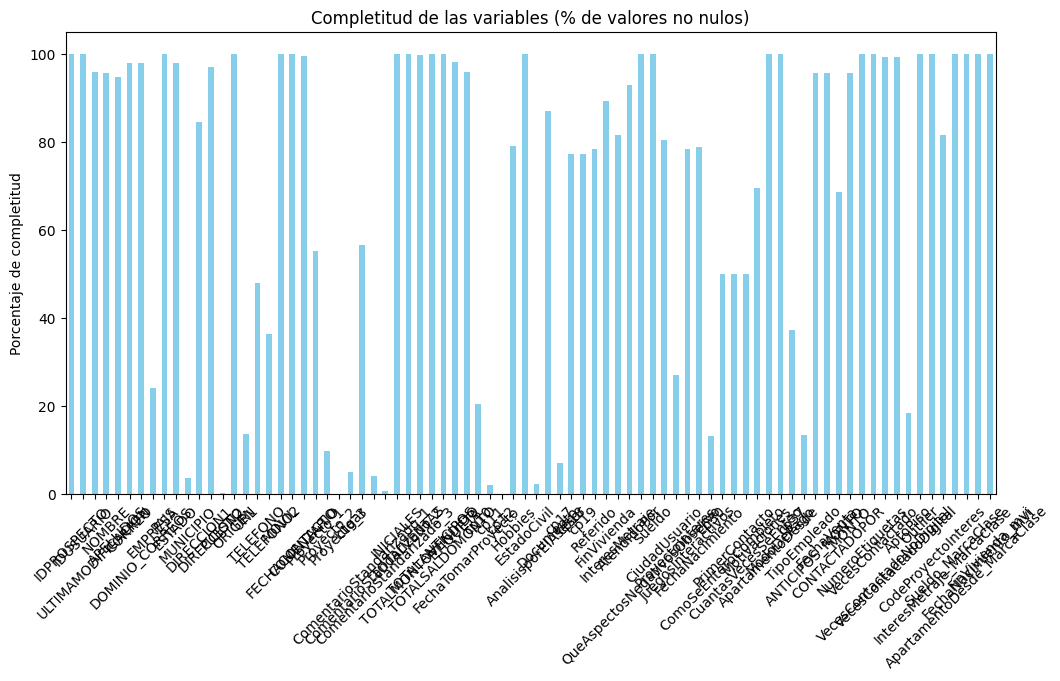

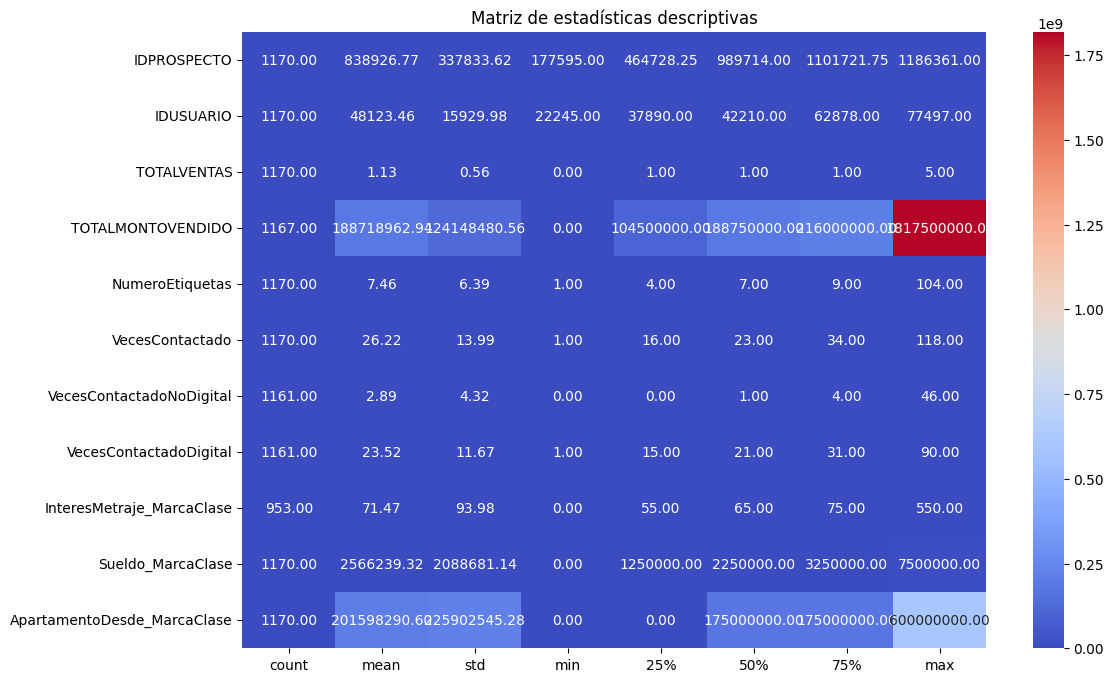

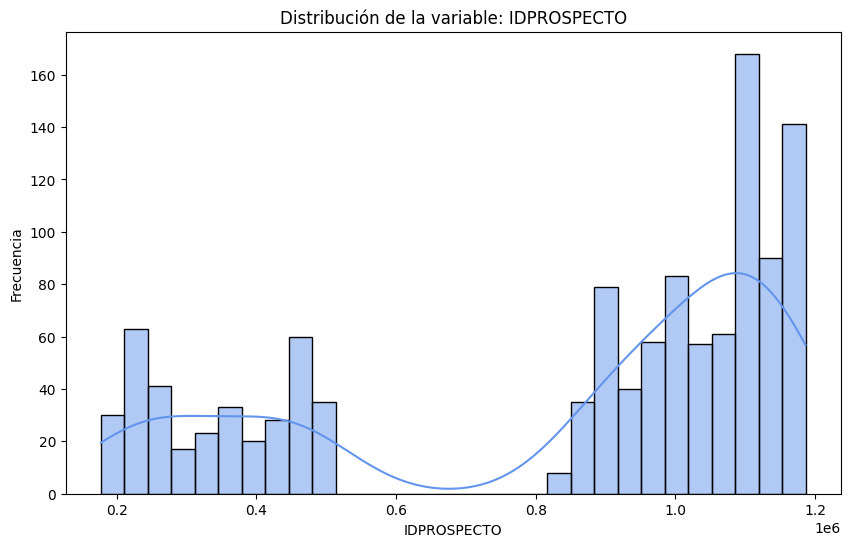

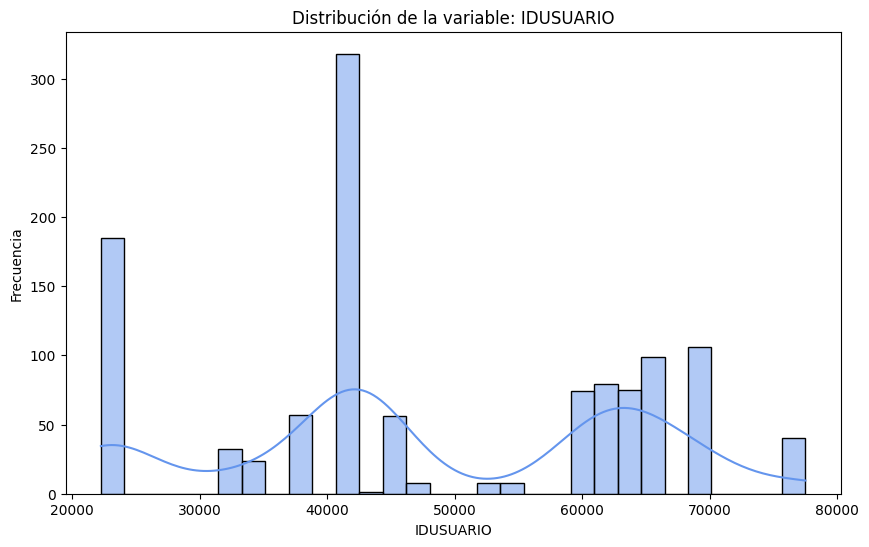

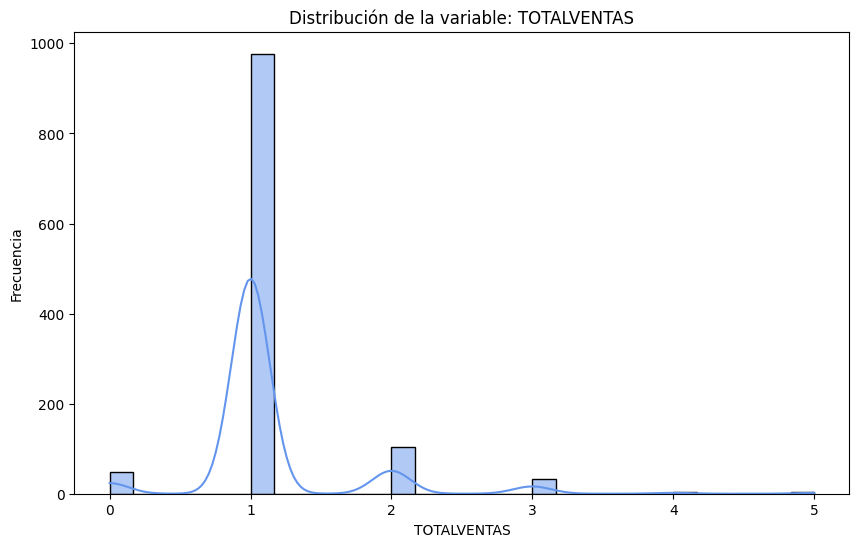

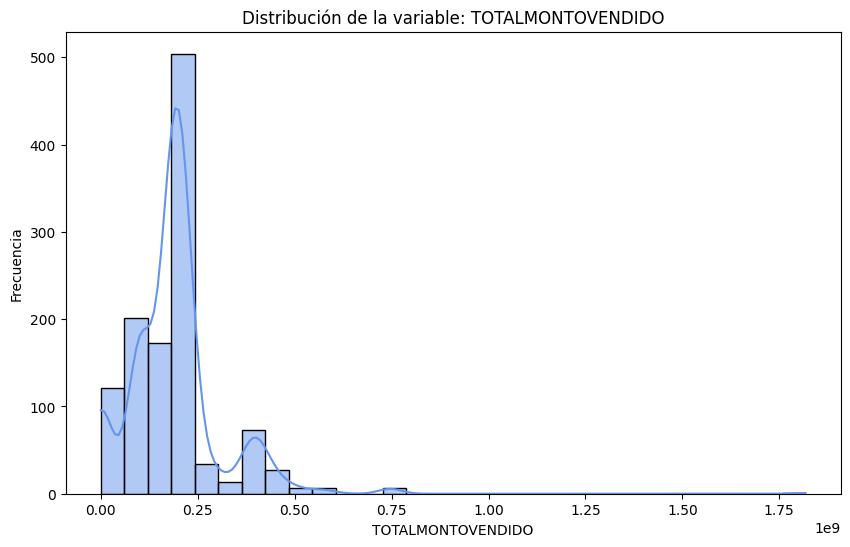

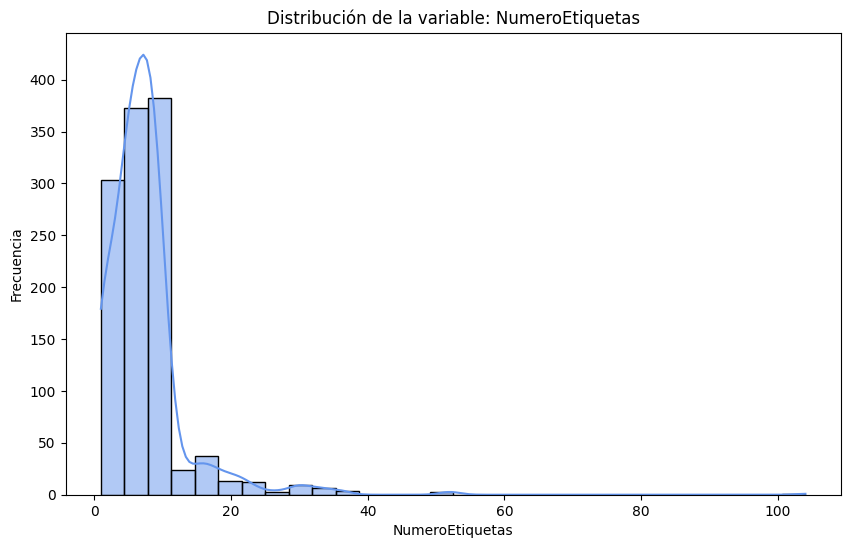

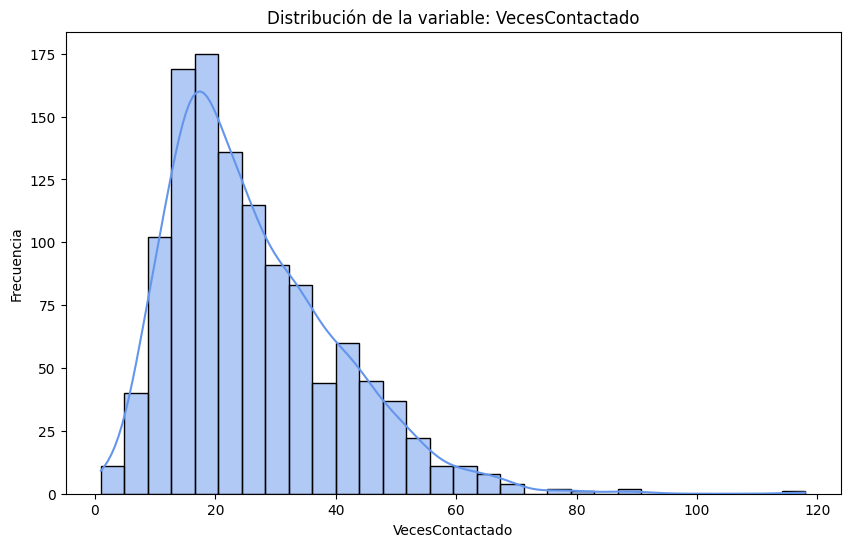

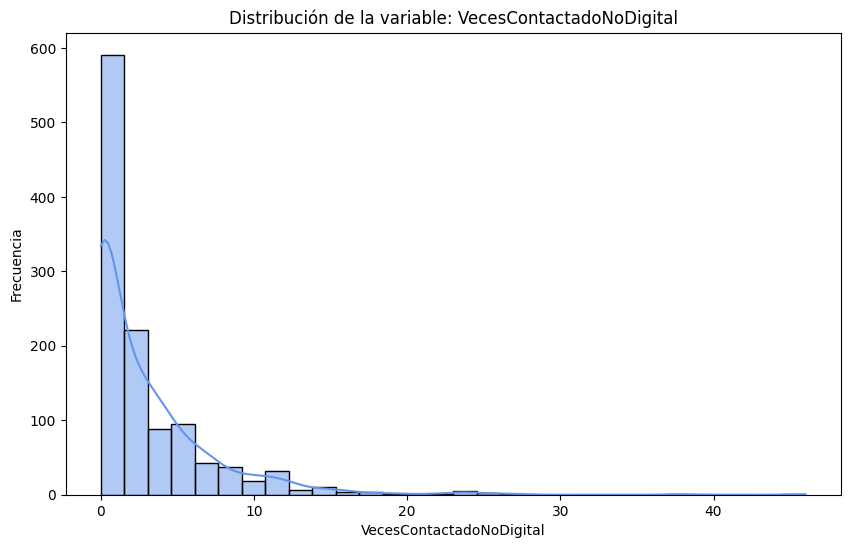

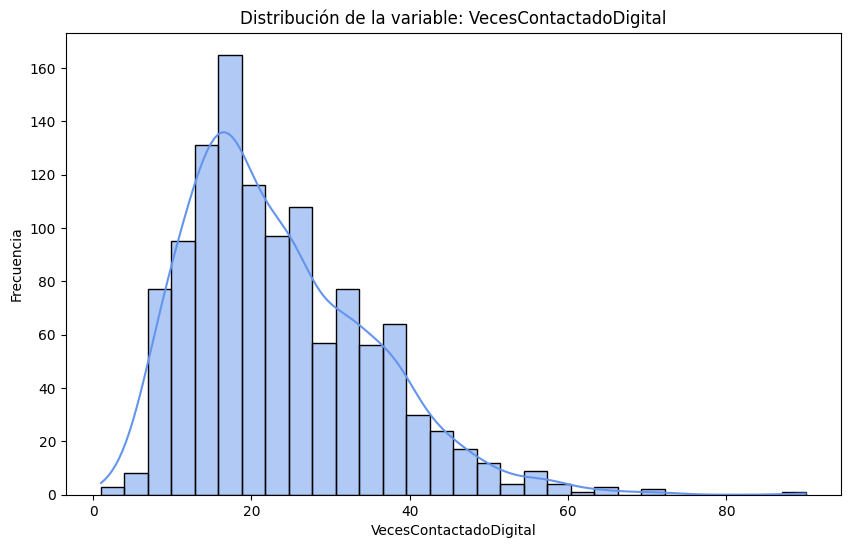

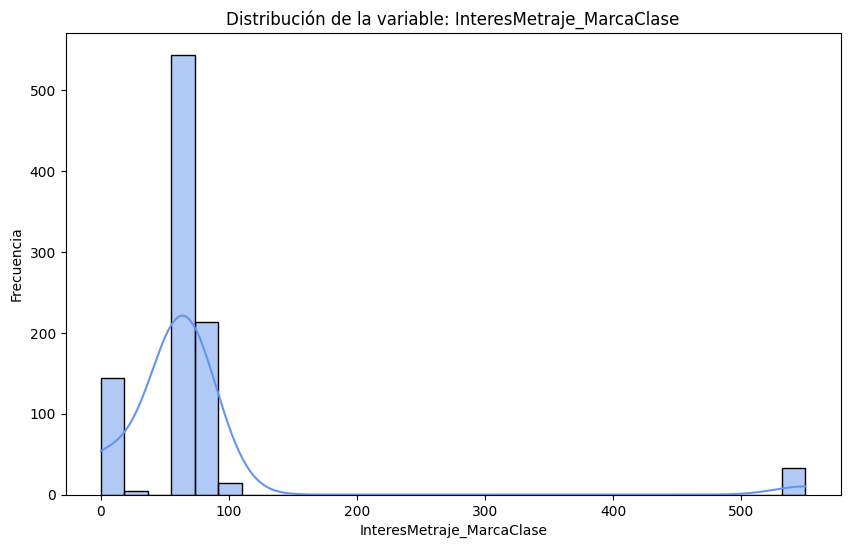

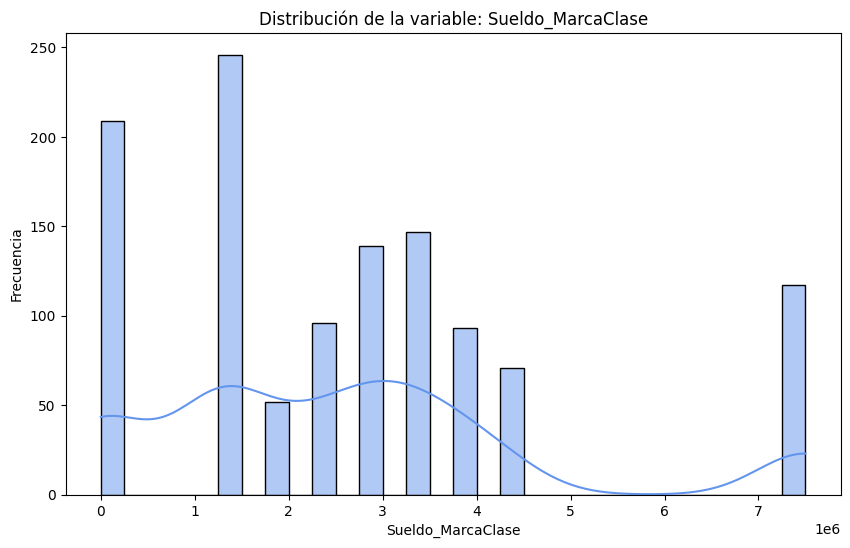

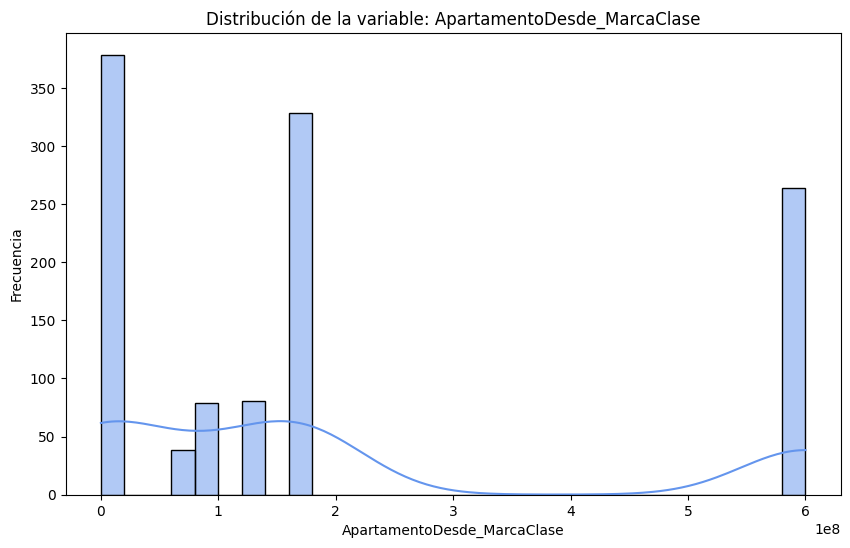

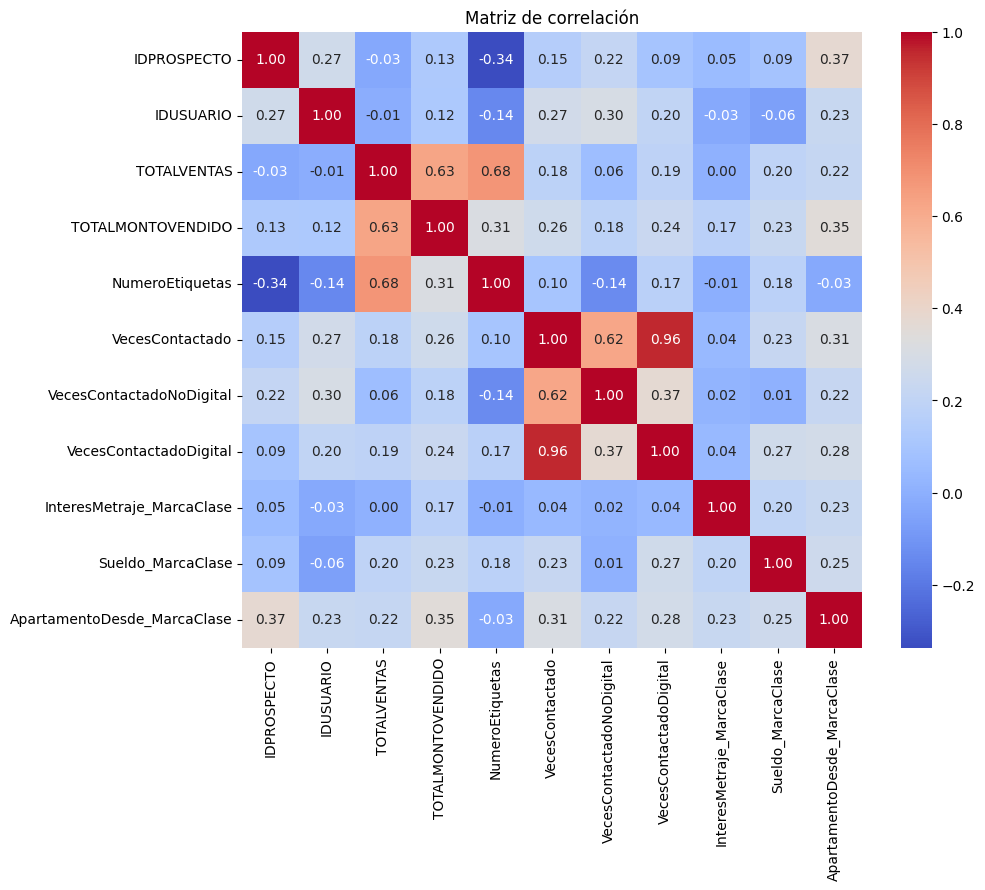

Conexión a la base de datos cerrada.


In [13]:
# 1. Conectar a la base de datos SQLite
try:
    conn = sqlite3.connect("/content/drive/MyDrive/UDistrital/CasoInmobiliaria/db_casoInmobiliaria_DS_course.db")
    print("Conexión a la base de datos exitosa.")
except Exception as e:
    print(f"Error al conectar a la base de datos: {e}")
    raise

# 2. Leer la tabla 'db_temp_Azure_vw_CLIENTES' en un DataFrame
try:
    df = pd.read_sql_query("SELECT * FROM db_temp_Azure_vw_CLIENTES", conn)
    print("Datos leídos exitosamente.")
except Exception as e:
    print(f"Error al leer la tabla: {e}")
    conn.close()
    raise

# 3. Verificación de completitud y visualización gráfica
completitud = df.notnull().mean() * 100
completitud.plot(kind='bar', figsize=(12, 6), color='skyblue')
plt.title('Completitud de las variables (% de valores no nulos)')
plt.ylabel('Porcentaje de completitud')
plt.xticks(rotation=45)
plt.show()

# 4. Estadísticas descriptivas para variables numéricas y visualización de la matriz
estadisticas_descriptivas = df.describe().transpose()
plt.figure(figsize=(12, 8))
sns.heatmap(estadisticas_descriptivas, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matriz de estadísticas descriptivas')
plt.show()

# 5. Distribución de las variables numéricas
variables_numericas = df.select_dtypes(include=['float64', 'int64']).columns

for var in variables_numericas:
    plt.figure(figsize=(10, 6))
    sns.histplot(df[var].dropna(), kde=True, bins=30, color='cornflowerblue')
    plt.title(f'Distribución de la variable: {var}')
    plt.xlabel(var)
    plt.ylabel('Frecuencia')
    plt.show()

# 6. Matriz de correlación para variables numéricas
plt.figure(figsize=(10, 8))
correlacion = df[variables_numericas].corr()
sns.heatmap(correlacion, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matriz de correlación')
plt.show()

# 7. Cerrar la conexión a la base de datos
conn.close()
print("Conexión a la base de datos cerrada.")


#Version EDA
##Uso de missingno para Visualización de Completitud
missingno es una biblioteca especializada en la visualización de datos faltantes.

In [11]:
import missingno as msno

Conexión a la base de datos exitosa.
Datos leídos exitosamente.


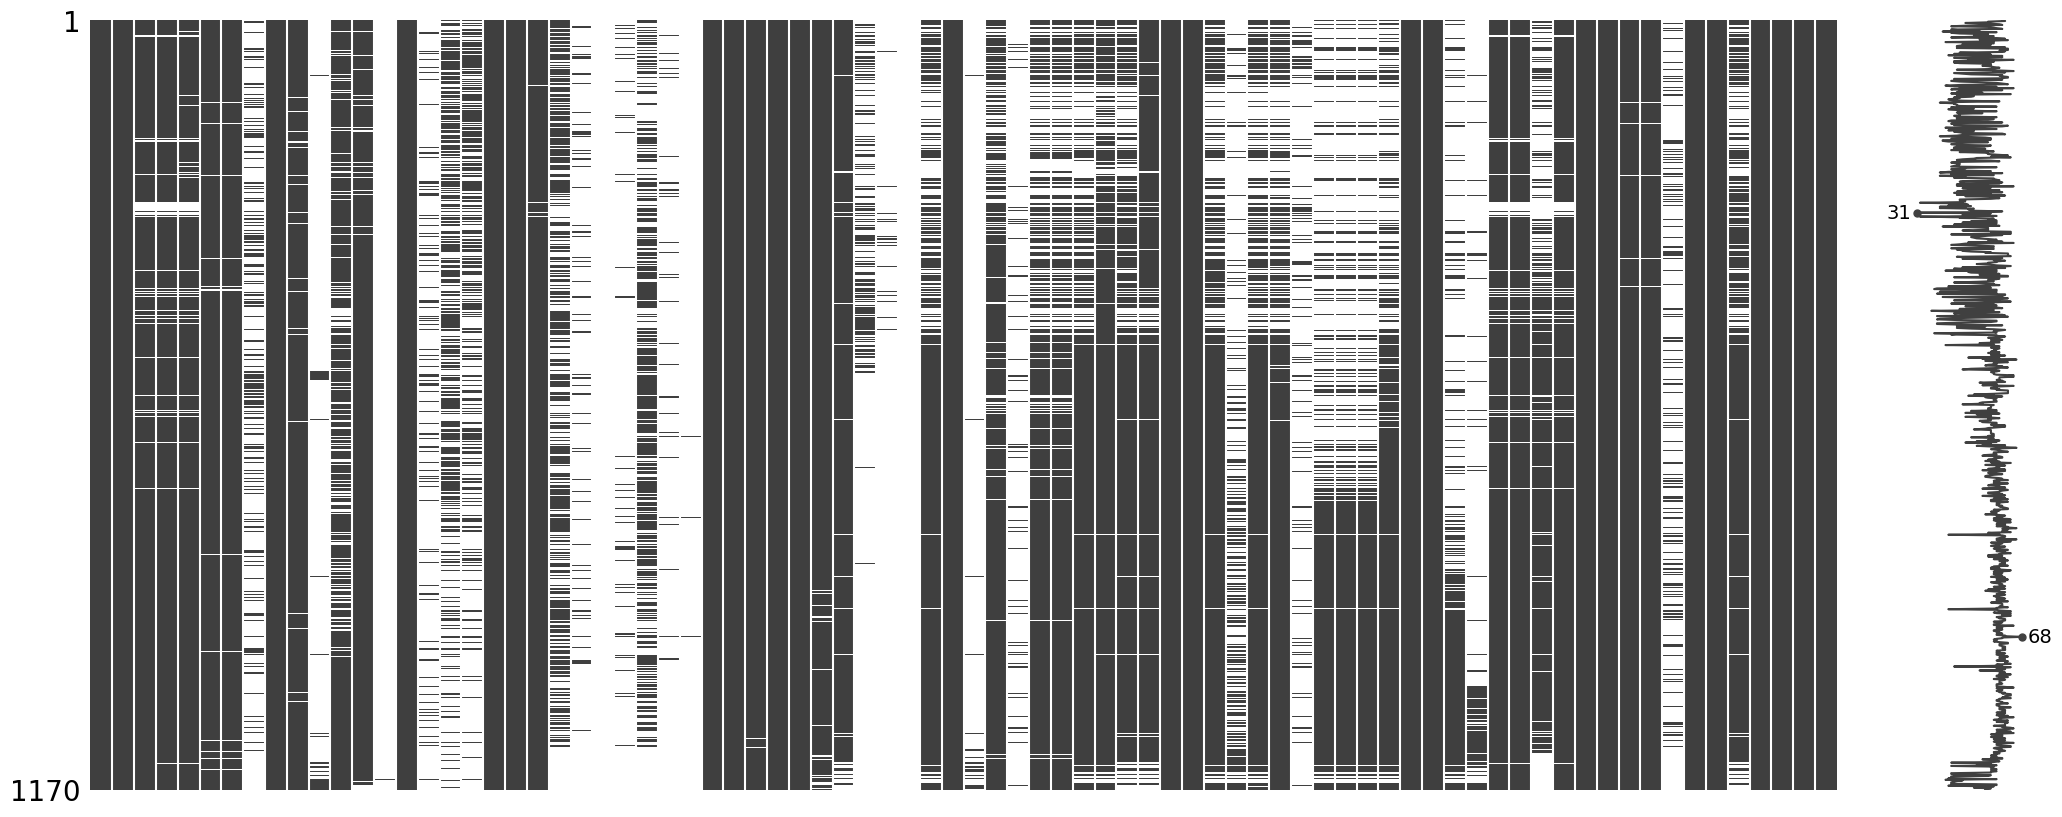

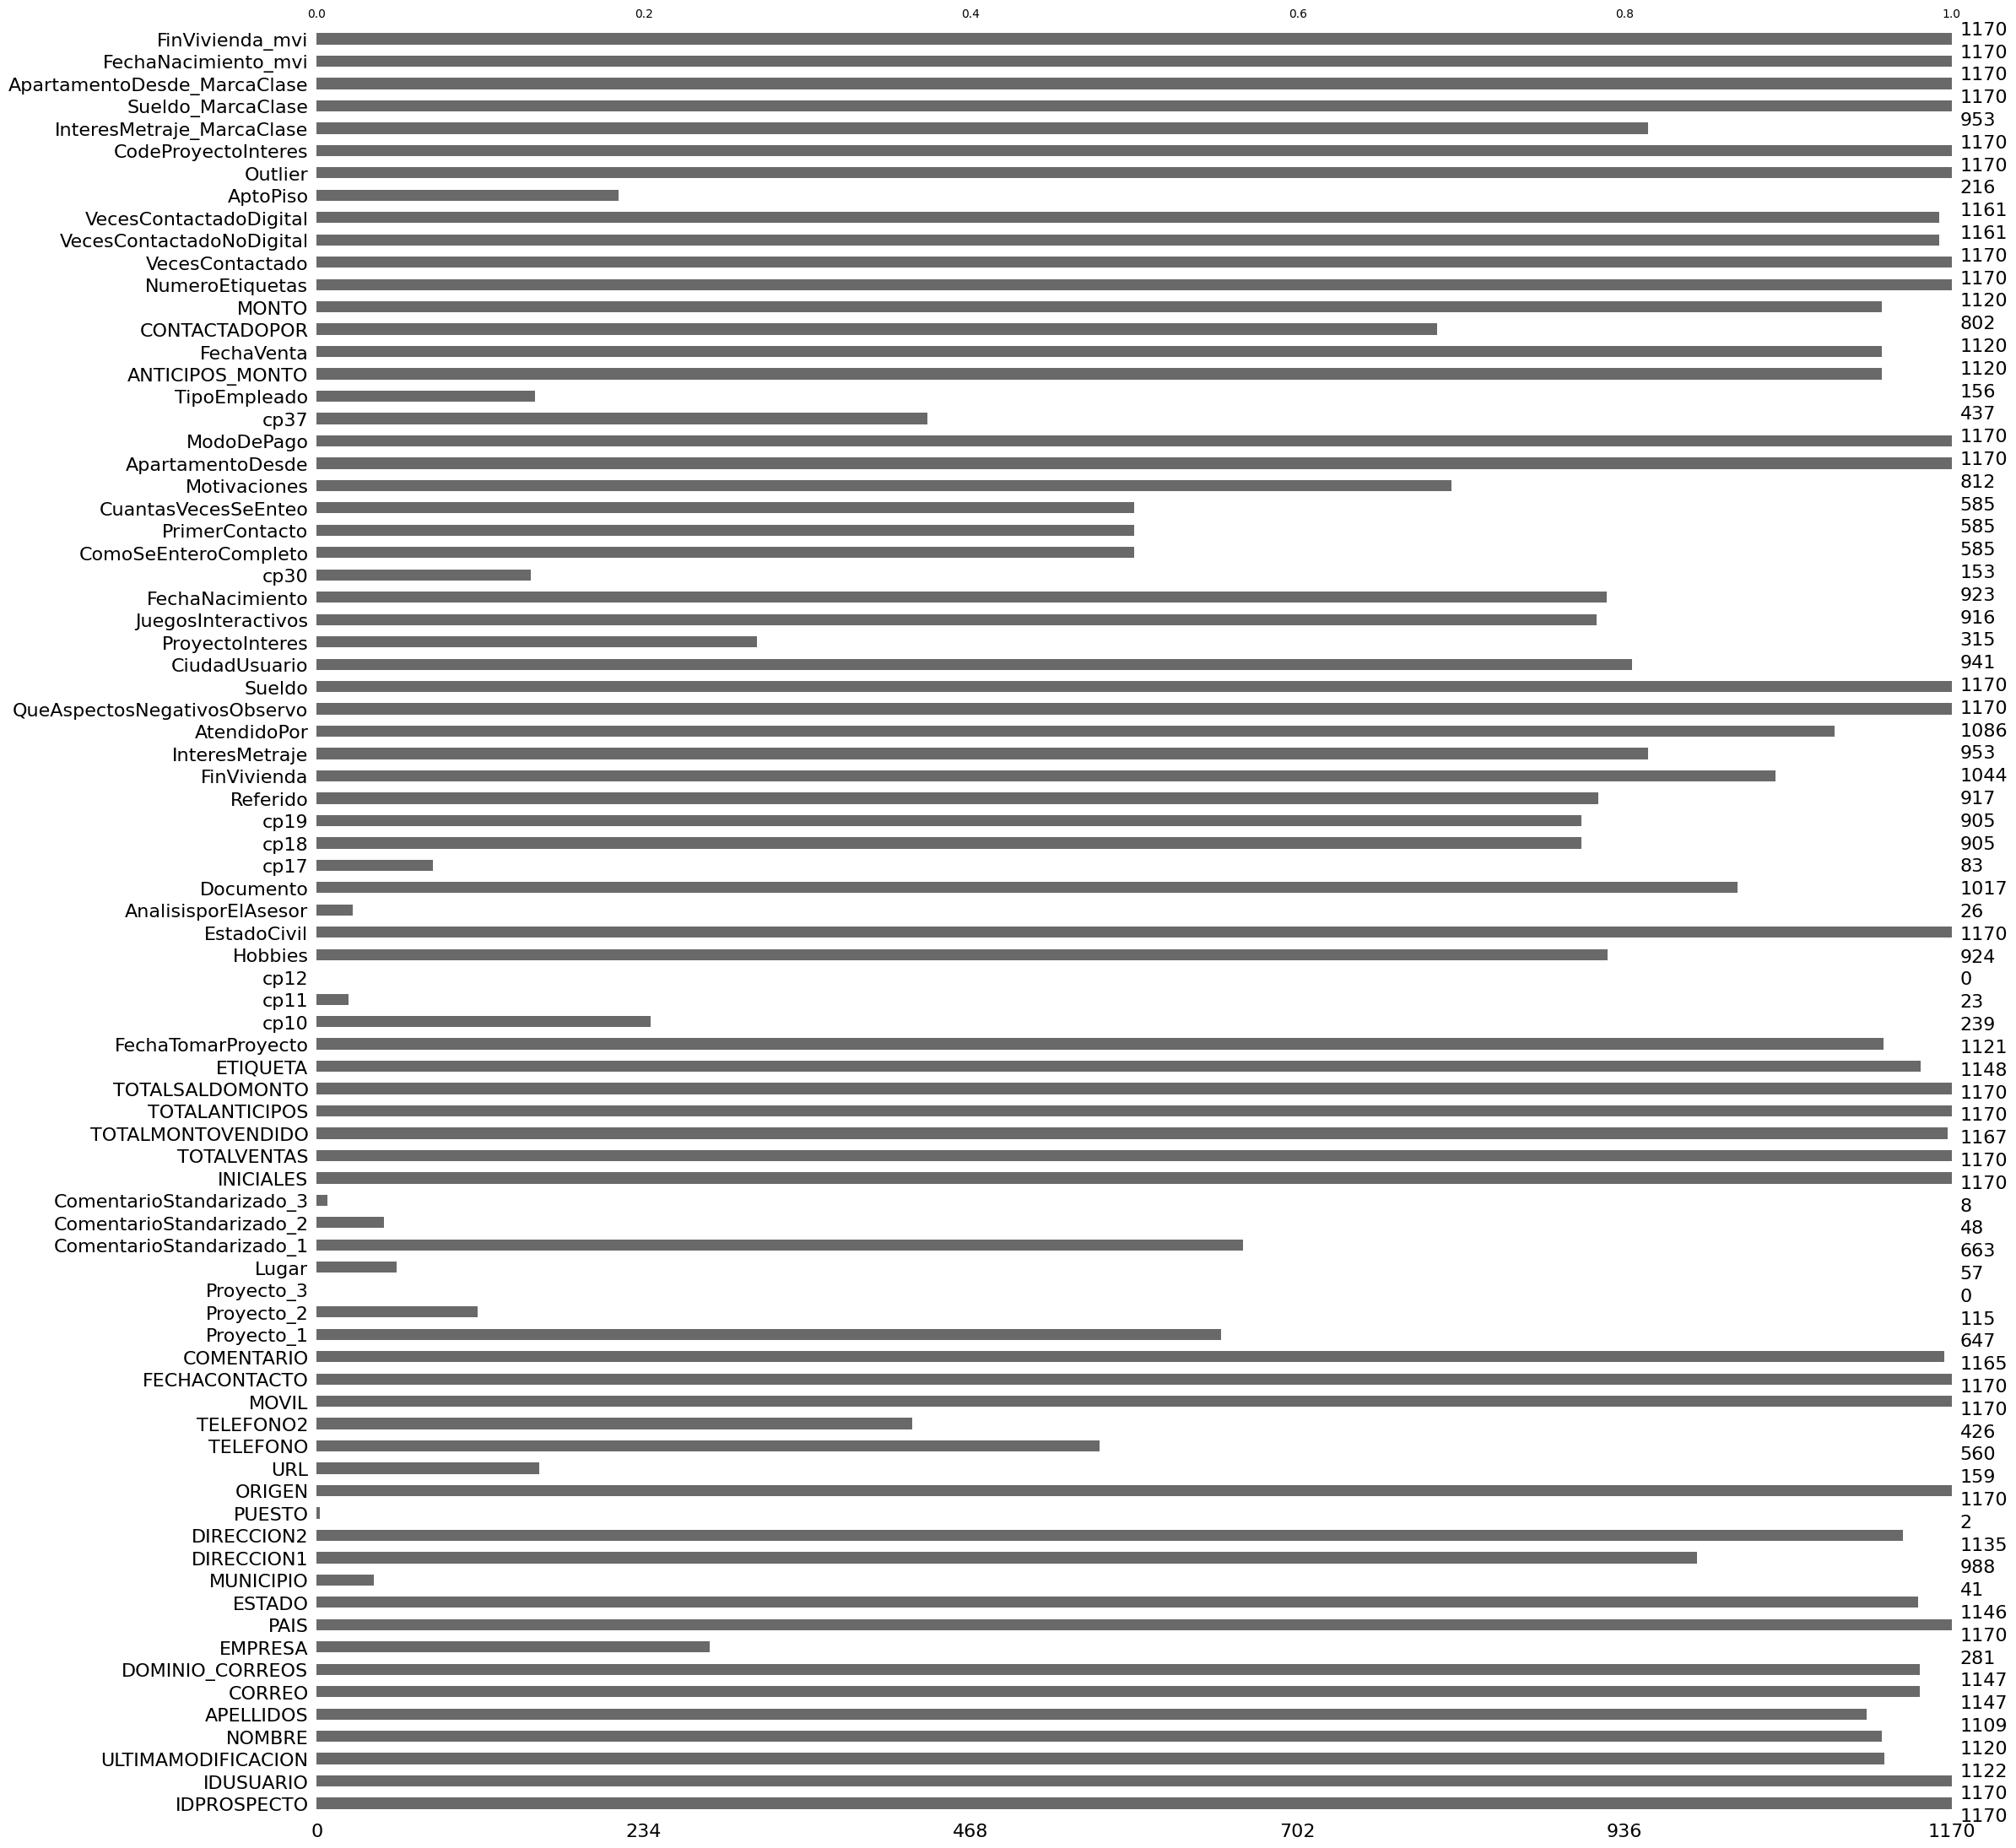

Conexión a la base de datos cerrada.


In [27]:
# Conectar a la base de datos SQLite
try:
    conn = sqlite3.connect("/content/drive/MyDrive/UDistrital/CasoInmobiliaria/db_casoInmobiliaria_DS_course.db")
    print("Conexión a la base de datos exitosa.")
except Exception as e:
    print(f"Error al conectar a la base de datos: {e}")
    raise

# Leer la tabla en un DataFrame
try:
    df = pd.read_sql_query("SELECT * FROM db_temp_Azure_vw_CLIENTES", conn)
    print("Datos leídos exitosamente.")
except Exception as e:
    print(f"Error al leer la tabla: {e}")
    conn.close()
    raise

# Visualización de completitud usando missingno
msno.matrix(df)
plt.show()

msno.bar(df)
plt.show()

# Cerrar la conexión
conn.close()
print("Conexión a la base de datos cerrada.")


#Visualización Avanzada con plotly

##Ventajas:

*   plotly ofrece gráficos interactivos que pueden ayudar a explorar los datos de manera más dinámica.
*   Es flexible y puede integrarse con dashboards o aplicaciones web.

In [ ]:
import plotly.express as px

In [ ]:
# Conectar a la base de datos SQLite
try:
    conn = sqlite3.connect("/content/drive/MyDrive/UDistrital/CasoInmobiliaria/db_casoInmobiliaria_DS_course.db")
    print("Conexión a la base de datos exitosa.")
except Exception as e:
    print(f"Error al conectar a la base de datos: {e}")
    raise

# Leer la tabla en un DataFrame
try:
    df = pd.read_sql_query("SELECT * FROM db_temp_Azure_vw_CLIENTES", conn)
    print("Datos leídos exitosamente.")
except Exception as e:
    print(f"Error al leer la tabla: {e}")
    conn.close()
    raise

# Ejemplo: Gráfico de dispersión interactivo
fig = px.scatter(df, x="InteresMetraje_MarcaClase", y="Sueldo_MarcaClase", color="ApartamentoDesde_MarcaClase", hover_data=['InteresMetraje', 'Sueldo', 'ApartamentoDesde'])
fig.show()

# Cerrar la conexión
conn.close()
print("Conexión a la base de datos cerrada.")


Conexión a la base de datos exitosa.
Datos leídos exitosamente.


Conexión a la base de datos cerrada.


#Missing Values Imputation Techniques

##Imputación Aleatoria Basada en la Distribución
La idea aquí es que, en lugar de usar la media o la moda, seleccionamos valores al azar de la distribución existente para los valores no nulos y los aplicamos a los valores faltantes.

In [1]:
import sqlite3
import pandas as pd
import numpy as np

In [36]:
# Conectar a la base de datos SQLite
try:
    conn = sqlite3.connect("/content/drive/MyDrive/UDistrital/CasoInmobiliaria/db_casoInmobiliaria_DS_course.db")
    print("Conexión a la base de datos exitosa.")
except Exception as e:
    print(f"Error al conectar a la base de datos: {e}")
    raise

# Leer la tabla 'db_temp_Azure_vw_CLIENTES' en un DataFrame
try:
    df = pd.read_sql_query("SELECT * FROM db_temp_Azure_vw_CLIENTES", conn)
    print("Datos leídos exitosamente.")
except Exception as e:
    print(f"Error al leer la tabla: {e}")
    conn.close()
    raise

# Función para imputar de manera aleatoria según la distribución de los datos
def imputacion_aleatoria(df, variable):
    # Crear una nueva columna con el sufijo '_mvi' para conservar la original
    variable_mvi = variable + '_mvi'
    df[variable_mvi] = df[variable]

    # Extraer los valores no nulos
    valores_disponibles = df[variable].dropna().values
    # Reemplazar valores faltantes de manera aleatoria según la distribución existente
    df[variable_mvi] = df[variable_mvi].apply(lambda x: np.random.choice(valores_disponibles) if pd.isnull(x) else x)
    return df

# Aplicar la imputación aleatoria a las variables seleccionadas
df = imputacion_aleatoria(df, 'FechaNacimiento')
df = imputacion_aleatoria(df, 'FinVivienda')

# Mostrar los valores faltantes después de la imputación
print("\nValores faltantes después de la imputación aleatoria:")
print(df[['FechaNacimiento_mvi', 'FinVivienda_mvi']].isnull().sum())

# Actualizar la tabla en la base de datos SQLite con los valores imputados
try:
    df.to_sql('db_temp_Azure_vw_CLIENTES', conn, if_exists='replace', index=False)
    print("Tabla actualizada exitosamente con nuevas variables imputadas (_mvi).")
except Exception as e:
    print(f"Error al actualizar la tabla en la base de datos: {e}")
finally:
    conn.close()
    print("Conexión a la base de datos cerrada.")


Conexión a la base de datos exitosa.
Datos leídos exitosamente.

Valores faltantes después de la imputación aleatoria:
FechaNacimiento_mvi    0
FinVivienda_mvi        0
dtype: int64
Tabla actualizada exitosamente con nuevas variables imputadas (_mvi).
Conexión a la base de datos cerrada.


##Imputación Supervisada con un Árbol de Decisión

En este caso, vamos a usar un Árbol de Decisión para predecir los valores faltantes de Fecha de Nacimiento y Fin Vivienda, basándonos en otras variables del dataset. El Árbol de Decisión es un modelo supervisado que puede realizar predicciones basadas en reglas que derivan de otras características.

In [37]:
from sklearn.tree import DecisionTreeClassifier
import numpy as np
import pandas as pd
from sklearn.impute import SimpleImputer

In [38]:
# Función para imputar valores categóricos usando un Árbol de Decisión Clasificador
def imputacion_arbol_decision_categorico(df, variable, valor_a_imputar, variables_predictoras):
    variable_mvi = variable + '_mvi_v2'
    df[variable_mvi] = df[variable]

    # Filtrar los valores que tienen "No especifica"
    df_faltante = df[df[variable_mvi] == valor_a_imputar]

    # Crear una copia del DataFrame sin los valores "No especifica" para entrenar el modelo
    df_completo = df[df[variable_mvi] != valor_a_imputar]

    # Imputar previamente los valores faltantes de las variables predictoras
    imputer = SimpleImputer(strategy='most_frequent')
    df_completo[variables_predictoras] = imputer.fit_transform(df_completo[variables_predictoras])
    df_faltante[variables_predictoras] = imputer.transform(df_faltante[variables_predictoras])

    # Verificar si hay suficientes datos para entrenar el modelo
    if df_completo.empty:
        raise ValueError(f"No hay suficientes datos completos para entrenar el modelo de imputación para la variable {variable}.")

    # Entrenar el modelo de Árbol de Decisión Clasificador
    X = df_completo[variables_predictoras]
    y = df_completo[variable_mvi]

    arbol = DecisionTreeClassifier(random_state=42)
    arbol.fit(X, y)

    # Predecir los valores faltantes (donde 'EstadoCivil' es 'No especifica')
    df.loc[df[variable_mvi] == valor_a_imputar, variable_mvi] = arbol.predict(df_faltante[variables_predictoras])

    return df

# Conectar a la base de datos SQLite
try:
    conn = sqlite3.connect("/content/drive/MyDrive/UDistrital/CasoInmobiliaria/db_casoInmobiliaria_DS_course.db")
    print("Conexión a la base de datos exitosa.")
except Exception as e:
    print(f"Error al conectar a la base de datos: {e}")
    raise

# Leer la tabla 'db_temp_Azure_vw_CLIENTES' en un DataFrame
try:
    df = pd.read_sql_query("SELECT * FROM db_temp_Azure_vw_CLIENTES", conn)
    print("Datos leídos exitosamente.")
except Exception as e:
    print(f"Error al leer la tabla: {e}")
    conn.close()
    raise

# Definir las variables predictoras
variables_predictoras = ['InteresMetraje_MarcaClase', 'Sueldo_MarcaClase', 'ApartamentoDesde_MarcaClase']

# Imputar la variable 'EstadoCivil' donde el valor es "No especifica"
df = imputacion_arbol_decision_categorico(df, 'EstadoCivil', 'No especifica', variables_predictoras)

# Mostrar los valores imputados para 'EstadoCivil_mvi_v2'
print("\nDistribución de la variable 'EstadoCivil_mvi_v2' después de la imputación:")
print(df['EstadoCivil_mvi_v2'].value_counts())

# Actualizar la tabla en la base de datos SQLite con los valores imputados
try:
    df.to_sql('db_temp_Azure_vw_CLIENTES', conn, if_exists='replace', index=False)
    print("Tabla actualizada exitosamente con nuevas variables imputadas (_mvi_v2).")
except Exception as e:
    print(f"Error al actualizar la tabla en la base de datos: {e}")
finally:
    conn.close()
    print("Conexión a la base de datos cerrada.")


Conexión a la base de datos exitosa.
Datos leídos exitosamente.

Distribución de la variable 'EstadoCivil_mvi_v2' después de la imputación:
EstadoCivil_mvi_v2
Casado (a)     678
Soltero (a)    446
UniÓn Libre     39
Viudo            7
Name: count, dtype: int64


<ipython-input-38-480a89e8ee66>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_completo[variables_predictoras] = imputer.fit_transform(df_completo[variables_predictoras])
<ipython-input-38-480a89e8ee66>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_faltante[variables_predictoras] = imputer.transform(df_faltante[variables_predictoras])


Tabla actualizada exitosamente con nuevas variables imputadas (_mvi_v2).
Conexión a la base de datos cerrada.


#MODELAMIENTO
##Cluster Analysis Kmeans


###Se conecta a la base de datos y se carga la tabla tbl_Kmeans_Iteracion_3_vmi en un DataFrame.

##Preprocesamiento:

1.   Se seleccionan las variables de entrada basadas en la lista proporcionada.
2.   Se aplica el escalado de datos usando StandardScaler para que todas las variables tengan la misma escala antes de aplicar el algoritmo K-means.


##Aplicación de K-means:

Se utiliza el algoritmo K-means para agrupar los datos en 3 clústeres (puedes ajustar este número según lo que desees explorar).
El resultado del clúster asignado para cada registro se almacena en una nueva columna llamada Cluster.
Visualización:

3.   Gráfico de dispersión: Muestra la relación entre las variables TOTALVENTAS y TOTALMONTOVENDIDO coloreada por el clúster.
4.   Gráfico de cajas (Boxplot): Para cada variable de entrada, se genera un gráfico de cajas que muestra la distribución de cada variable por clúster.

##Cierre de la conexión:

5.   Se cierra la conexión a la base de datos una vez completado el proceso.

##Visualización:

6.   Gráficos de dispersión: Comparan dos variables (en este caso TOTALVENTAS y TOTALMONTOVENDIDO) y muestran la distribución de los datos por clúster.
7.   Boxplots: Muestran cómo se distribuyen las variables de entrada para cada clúster, ayudando a visualizar las diferencias entre clústeres.

##Ajustes:
Si necesitas ajustar el número de clústeres, puedes cambiar el parámetro n_clusters en KMeans. También podemos agregar más gráficos o ajustar las variables que se utilizan en los gráficos de dispersión.

In [39]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import sqlite3

In [56]:
ruta_base_de_datos = '/content/drive/MyDrive/UDistrital/CasoInmobiliaria/V2/db_casoInmobiliaria_DS_course.db'

In [63]:
# Conectar a la base de datos SQLite
try:
    conn = sqlite3.connect("/content/drive/MyDrive/UDistrital/CasoInmobiliaria/v2/db_casoInmobiliaria_DS_course.db")
    print("Conexión a la base de datos exitosa.")
except Exception as e:
    print(f"Error al conectar a la base de datos: {e}")
    raise

# Listar todas las tablas en la base de datos
try:
    query = "SELECT name FROM sqlite_master WHERE type='table';"
    tables = pd.read_sql_query(query, conn)
    print("Tablas disponibles en la base de datos:")
    print(tables)
except Exception as e:
    print(f"Error al listar las tablas: {e}")
finally:
    conn.close()
    print("Conexión a la base de datos cerrada.")


Conexión a la base de datos exitosa.
Tablas disponibles en la base de datos:
                             name
0  db_temp_Azure_tbl_TNS-TERCEROS
1   db_temp_Azure_vw_TNSvsSALESUP
2       db_temp_Azure_vw_CLIENTES
3        tbl_Kmean_Iteracion_3vmi
Conexión a la base de datos cerrada.


Conexión a la base de datos exitosa.
Datos leídos exitosamente.

Distribución de los clústeres:
Cluster
1    373
0    248
2      1
Name: count, dtype: int64


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


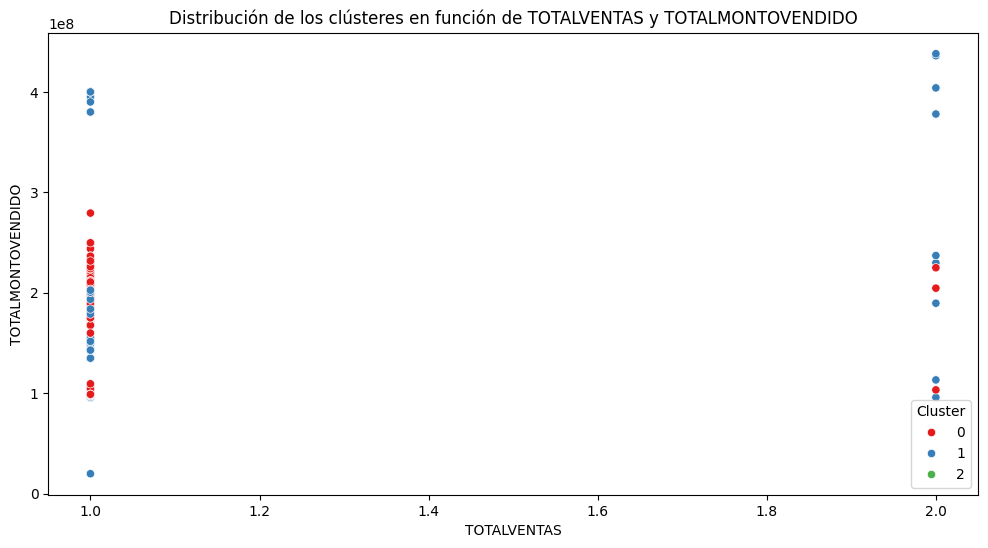

<ipython-input-64-da7a5e854a64>:55: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Cluster', y=var, data=df, palette='Set3')


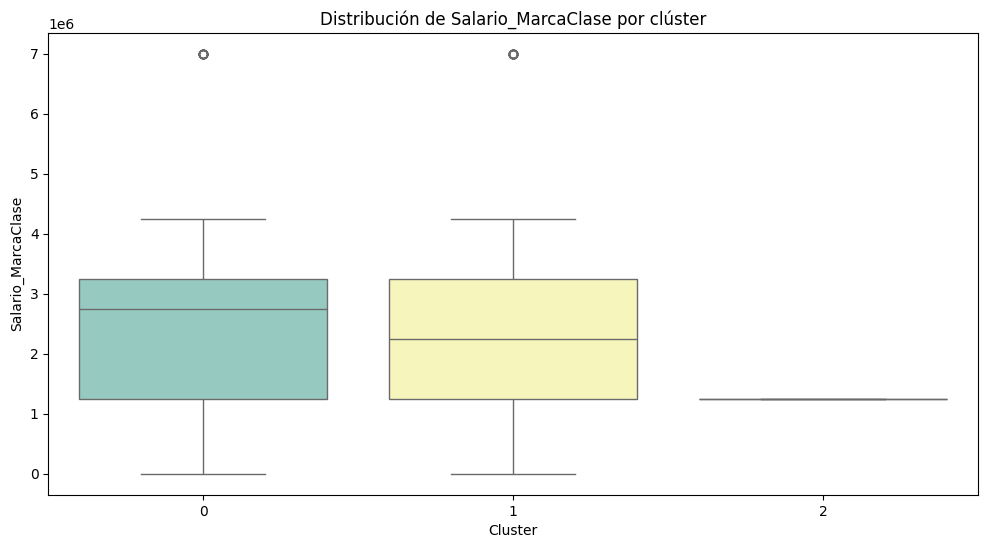

<ipython-input-64-da7a5e854a64>:55: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Cluster', y=var, data=df, palette='Set3')


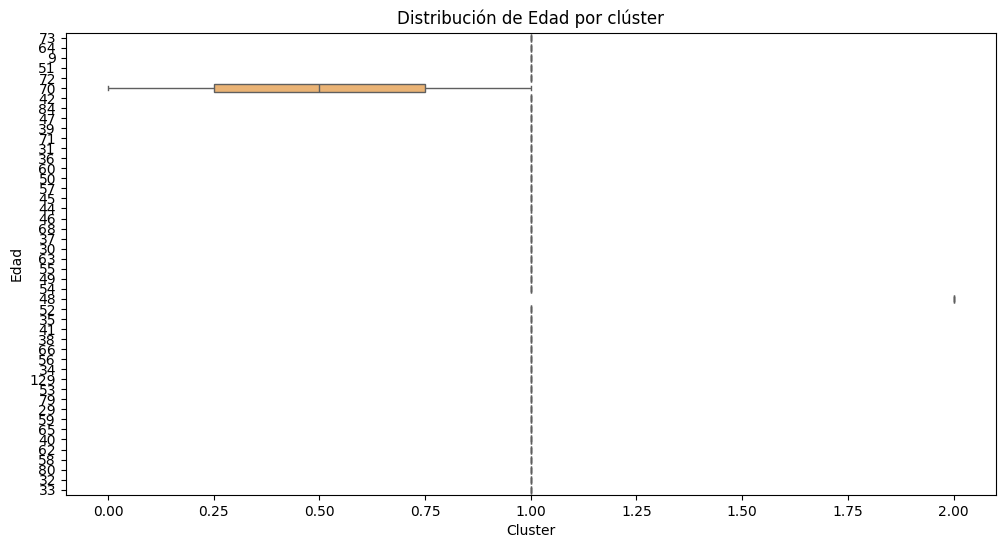

<ipython-input-64-da7a5e854a64>:55: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Cluster', y=var, data=df, palette='Set3')


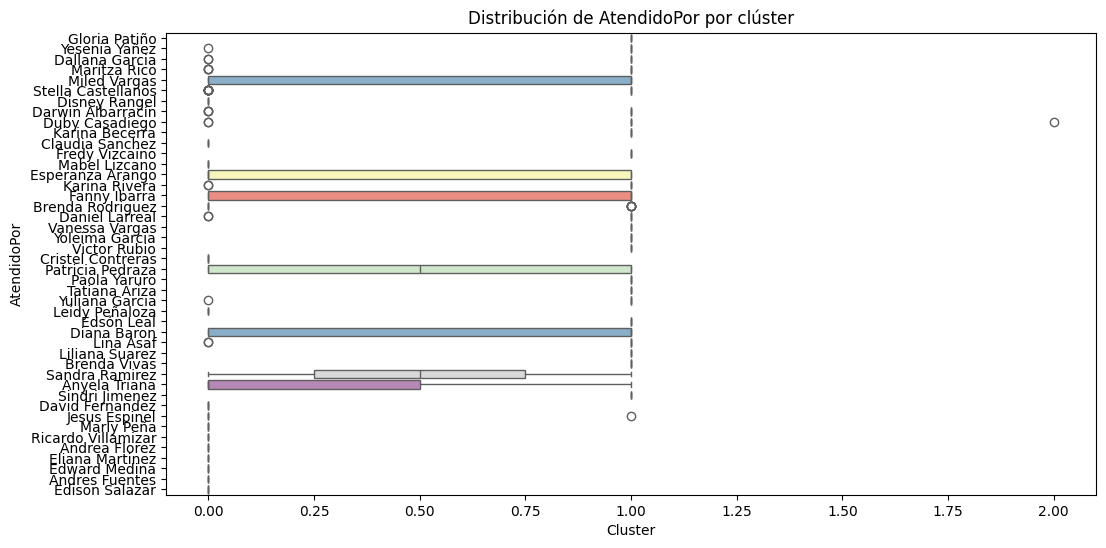

<ipython-input-64-da7a5e854a64>:55: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Cluster', y=var, data=df, palette='Set3')


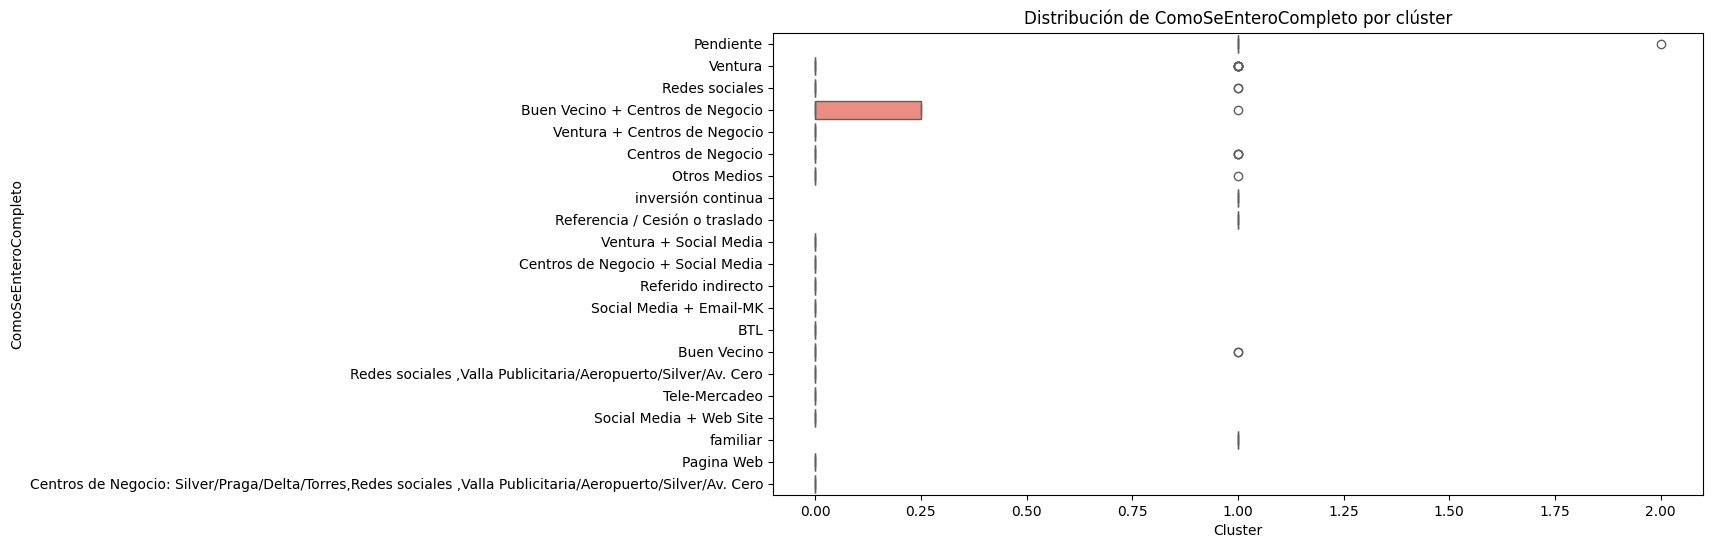

<ipython-input-64-da7a5e854a64>:55: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Cluster', y=var, data=df, palette='Set3')


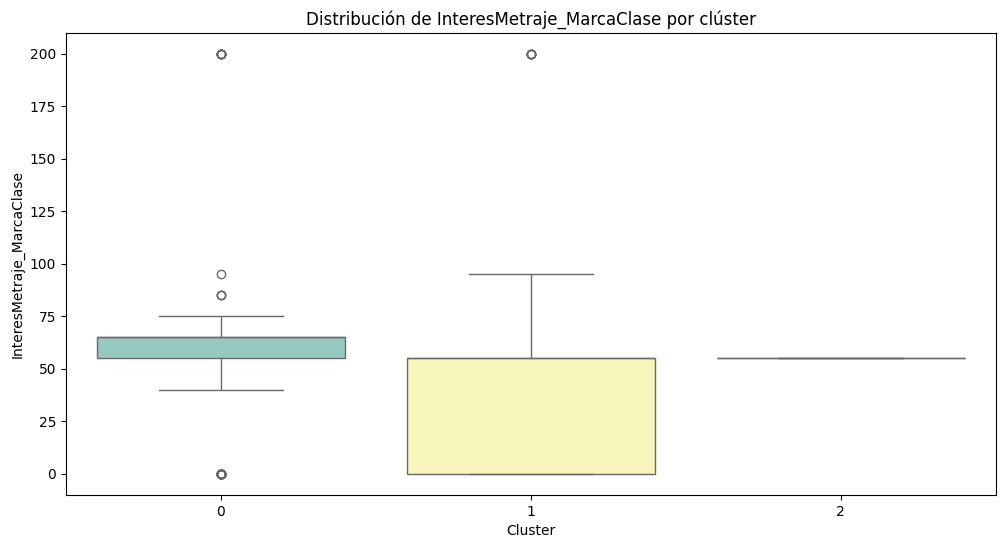

<ipython-input-64-da7a5e854a64>:55: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Cluster', y=var, data=df, palette='Set3')


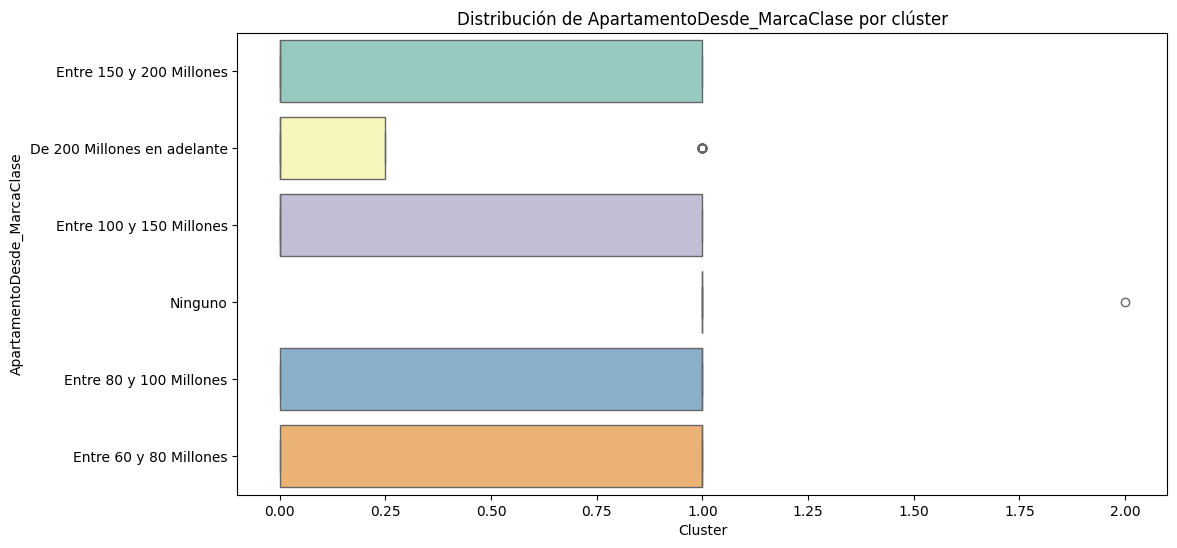

<ipython-input-64-da7a5e854a64>:55: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Cluster', y=var, data=df, palette='Set3')


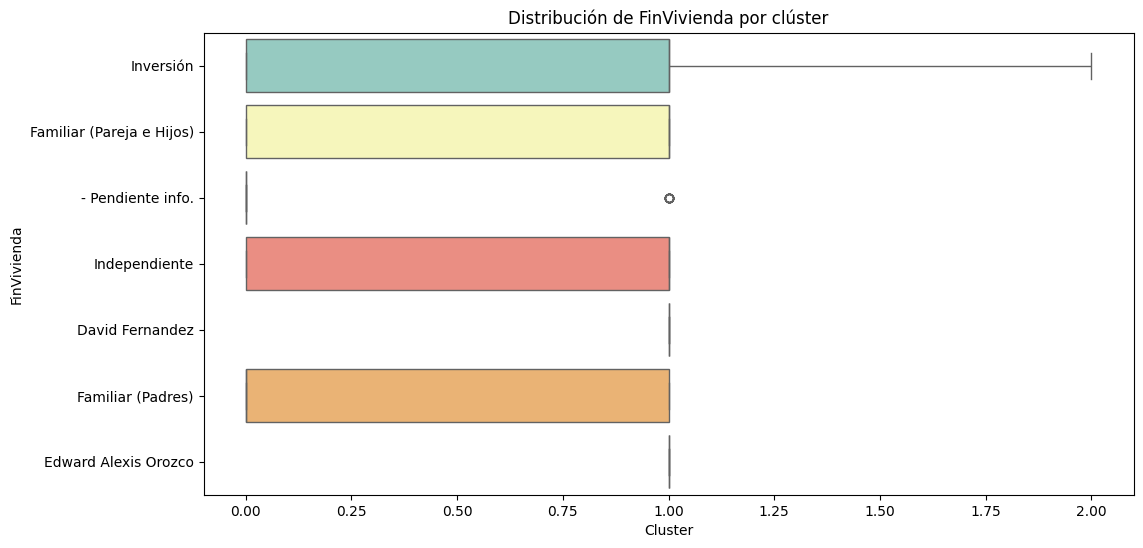

<ipython-input-64-da7a5e854a64>:55: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Cluster', y=var, data=df, palette='Set3')


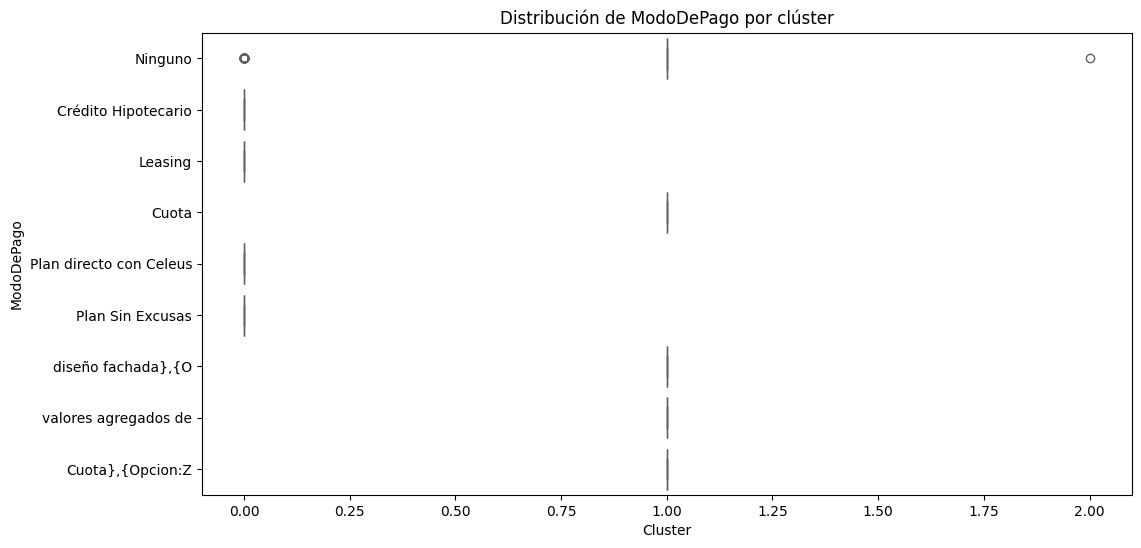

<ipython-input-64-da7a5e854a64>:55: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Cluster', y=var, data=df, palette='Set3')


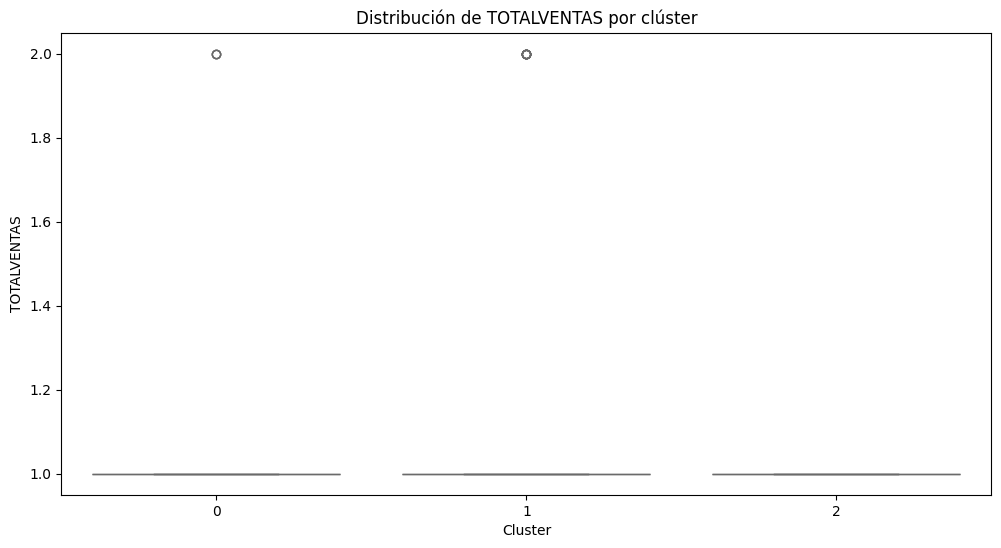

<ipython-input-64-da7a5e854a64>:55: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Cluster', y=var, data=df, palette='Set3')


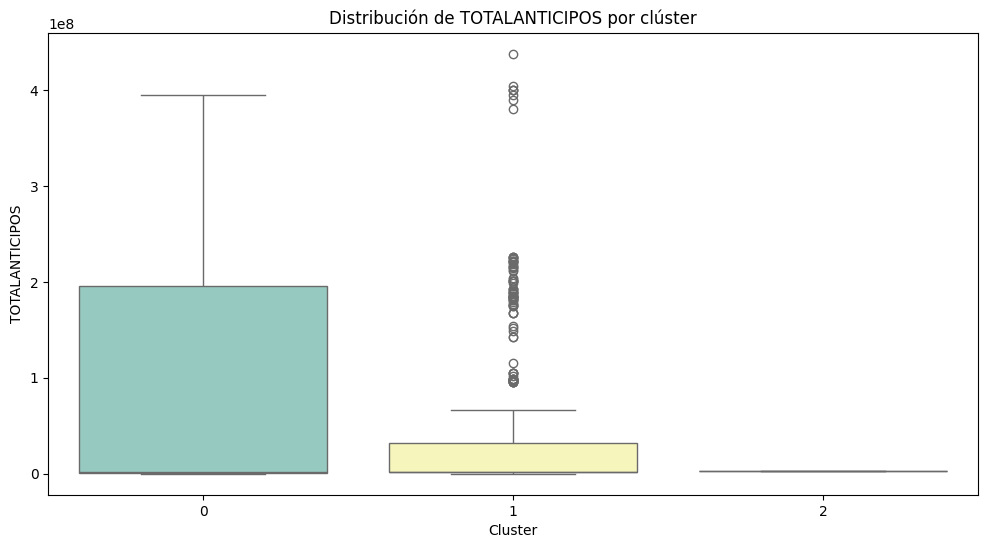

<ipython-input-64-da7a5e854a64>:55: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Cluster', y=var, data=df, palette='Set3')


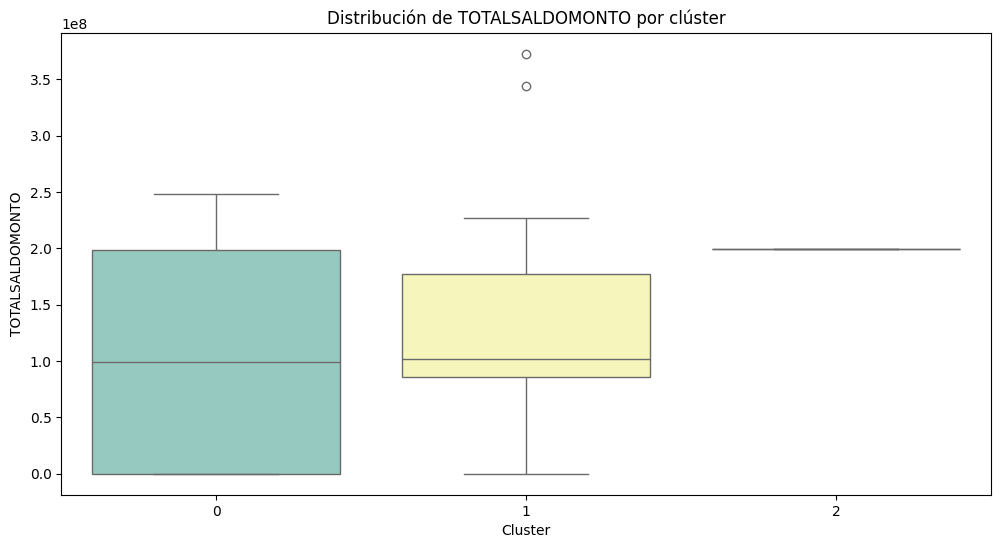

<ipython-input-64-da7a5e854a64>:55: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Cluster', y=var, data=df, palette='Set3')


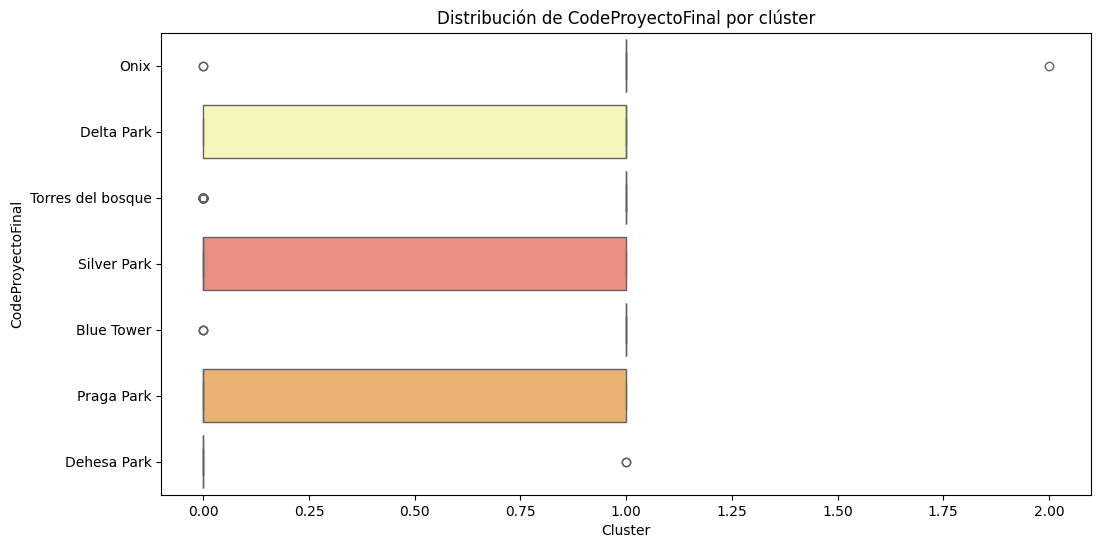

<ipython-input-64-da7a5e854a64>:55: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Cluster', y=var, data=df, palette='Set3')


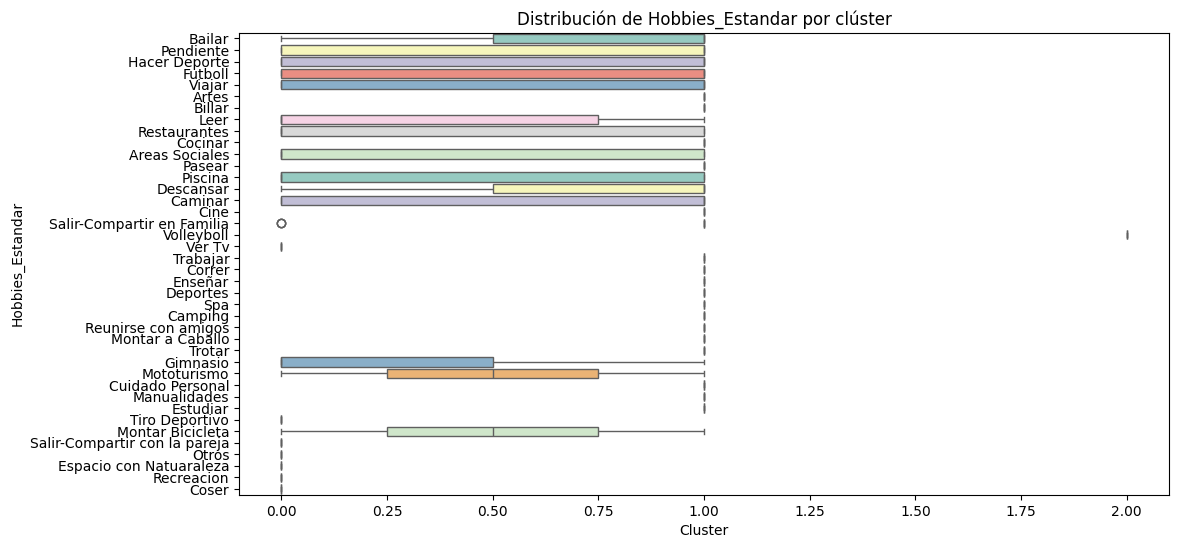

<ipython-input-64-da7a5e854a64>:55: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Cluster', y=var, data=df, palette='Set3')


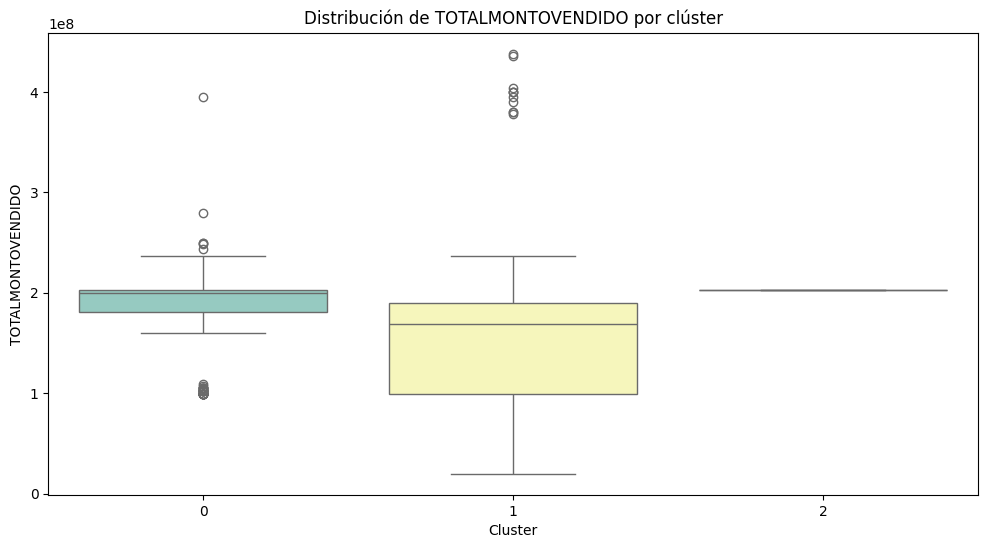

Conexión a la base de datos cerrada.


In [64]:
# Conectar a la base de datos SQLite
try:
    conn = sqlite3.connect("/content/drive/MyDrive/UDistrital/CasoInmobiliaria/v2/db_casoInmobiliaria_DS_course.db")
    print("Conexión a la base de datos exitosa.")
except Exception as e:
    print(f"Error al conectar a la base de datos: {e}")
    raise

# Leer la tabla 'tbl_Kmean_Iteracion_3vmi' en un DataFrame (Usar comillas dobles para el nombre de la tabla)
try:
    df = pd.read_sql_query('SELECT * FROM "tbl_Kmean_Iteracion_3vmi"', conn)
    print("Datos leídos exitosamente.")
except Exception as e:
    print(f"Error al leer la tabla: {e}")
    conn.close()
    raise

# Definir las variables input según la imagen
variables_input = [
    'Salario_MarcaClase', 'Edad', 'AtendidoPor', 'ComoSeEnteroCompleto',
    'InteresMetraje_MarcaClase', 'ApartamentoDesde_MarcaClase', 'FinVivienda',
    'ModoDePago', 'TOTALVENTAS', 'TOTALANTICIPOS', 'TOTALSALDOMONTO',
    'CodeProyectoFinal', 'Hobbies_Estandar', 'TOTALMONTOVENDIDO'
]

# Filtrar las variables de entrada para el análisis
df_input = df[variables_input]

# Convertir las variables categóricas a numéricas utilizando One-Hot Encoding
df_input_encoded = pd.get_dummies(df_input)

# Escalar los datos antes de aplicar K-means
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_input_encoded)

# Definir el modelo de K-means con 3 clústeres (puedes ajustar este número)
kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster'] = kmeans.fit_predict(df_scaled)

# Visualizar la distribución de los clústeres
print("\nDistribución de los clústeres:")
print(df['Cluster'].value_counts())

# Visualizar gráficamente las diferencias en cada clúster
plt.figure(figsize=(12, 6))
sns.scatterplot(x=df['TOTALVENTAS'], y=df['TOTALMONTOVENDIDO'], hue=df['Cluster'], palette='Set1')
plt.title('Distribución de los clústeres en función de TOTALVENTAS y TOTALMONTOVENDIDO')
plt.xlabel('TOTALVENTAS')
plt.ylabel('TOTALMONTOVENDIDO')
plt.show()

# Crear una visualización de las diferencias entre clústeres para todas las variables
for var in variables_input:
    plt.figure(figsize=(12, 6))
    sns.boxplot(x='Cluster', y=var, data=df, palette='Set3')
    plt.title(f'Distribución de {var} por clúster')
    plt.show()

# Cerrar la conexión a la base de datos
conn.close()
print("Conexión a la base de datos cerrada.")


#Ver 2.0 Cluster Analysis (Kmeans)

In [70]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import plotly.express as px
import sqlite3

In [71]:
# Conectar a la base de datos SQLite
try:
    conn = sqlite3.connect("/content/drive/MyDrive/UDistrital/CasoInmobiliaria/v2/db_casoInmobiliaria_DS_course.db")
    print("Conexión a la base de datos exitosa.")
except Exception as e:
    print(f"Error al conectar a la base de datos: {e}")
    raise

# Leer la tabla 'tbl_Kmean_Iteracion_3vmi' en un DataFrame
try:
    df = pd.read_sql_query('SELECT * FROM "tbl_Kmean_Iteracion_3vmi"', conn)
    print("Datos leídos exitosamente.")
except Exception as e:
    print(f"Error al leer la tabla: {e}")
    conn.close()
    raise

# Definir las variables input según la imagen
variables_input = [
    'Salario_MarcaClase', 'Edad', 'AtendidoPor', 'ComoSeEnteroCompleto',
    'InteresMetraje_MarcaClase', 'ApartamentoDesde_MarcaClase', 'FinVivienda',
    'ModoDePago', 'TOTALVENTAS', 'TOTALANTICIPOS', 'TOTALSALDOMONTO',
    'CodeProyectoFinal', 'Hobbies_Estandar', 'TOTALMONTOVENDIDO'
]

# Filtrar las variables de entrada para el análisis
df_input = df[variables_input]

# Convertir las variables categóricas a numéricas utilizando One-Hot Encoding
df_input_encoded = pd.get_dummies(df_input)

# Escalar los datos antes de aplicar K-means
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_input_encoded)

# Definir el modelo de K-means con 3 clústeres (puedes ajustar este número)
kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster'] = kmeans.fit_predict(df_scaled)

# Visualizar la distribución de los clústeres usando Plotly Express
# Graficar TOTALVENTAS vs TOTALMONTOVENDIDO para cada clúster
fig = px.scatter(df, x='TOTALVENTAS', y='TOTALMONTOVENDIDO', color='Cluster',
                 title='Distribución de los clústeres en función de TOTALVENTAS y TOTALMONTOVENDIDO',
                 labels={'Cluster': 'Clúster'})
fig.show()

# Visualización de las diferencias por variable
# Usamos Plotly Express para generar gráficos interactivos de cada variable por clúster
for var in variables_input:
    fig = px.box(df, x='Cluster', y=var, title=f'Distribución de {var} por Clúster',
                 labels={'Cluster': 'Clúster', var: var})
    fig.show()

# Cerrar la conexión a la base de datos
conn.close()
print("Conexión a la base de datos cerrada.")


Conexión a la base de datos exitosa.
Datos leídos exitosamente.


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Conexión a la base de datos cerrada.


#PREDICCION

1.   Preparación de los datos: Vamos a separar los datos en variables predictoras (X) y la variable objetivo (y), que es Compra.
2.   División en conjuntos de entrenamiento y validación: Usaremos train_test_split de scikit-learn para dividir los datos en conjuntos de entrenamiento y validación.
3.   Entrenamiento del modelo: Usaremos un algoritmo de clasificación supervisado, como Random Forest o Decision Tree.
4.   Matriz de confusión: Evaluaremos el modelo utilizando una matriz de confusión para el conjunto de validación.


In [72]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import sqlite3
import matplotlib.pyplot as plt

Conexión a la base de datos exitosa.
Datos leídos exitosamente.


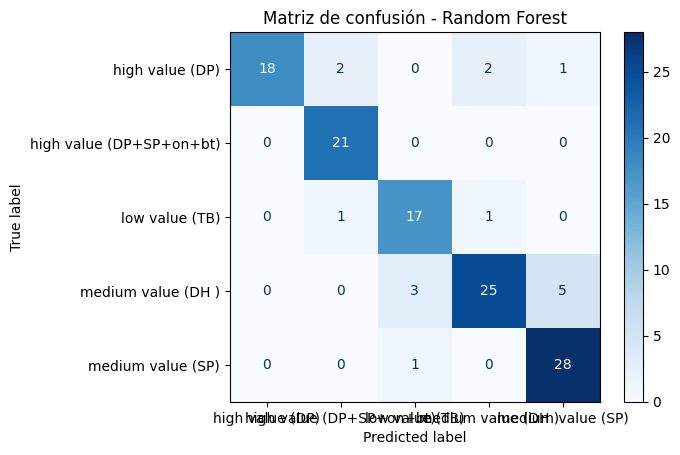

Conexión a la base de datos cerrada.


In [73]:
# Conectar a la base de datos SQLite
try:
    conn = sqlite3.connect("/content/drive/MyDrive/UDistrital/CasoInmobiliaria/v2/db_casoInmobiliaria_DS_course.db")
    print("Conexión a la base de datos exitosa.")
except Exception as e:
    print(f"Error al conectar a la base de datos: {e}")
    raise

# Leer la tabla 'tbl_Kmean_Iteracion_3vmi' en un DataFrame
try:
    df = pd.read_sql_query('SELECT * FROM "tbl_Kmean_Iteracion_3vmi"', conn)
    print("Datos leídos exitosamente.")
except Exception as e:
    print(f"Error al leer la tabla: {e}")
    conn.close()
    raise

# Definir las variables predictoras y la variable objetivo
X = df[['ComoSeEnteroCompleto_IMPUTACION', 'RangoEdad', 'Hobbies_Estandar', 'CodeProyectoFinal',
        'AtendidoPor', 'InteresMetraje_MarcaClase', 'ApartamentoDesde_MarcaClase', 'FinVivienda',
        'TOTALMONTOVENDIDO', 'TOTALANTICIPOS', 'TOTALSALDOMONTO', 'Salario_MarcaClase']]
y = df['Compra']  # Variable objetivo

# Convertir variables categóricas a numéricas (One-Hot Encoding)
X = pd.get_dummies(X)

# Dividir los datos en conjunto de entrenamiento y validación (80% entrenamiento, 20% validación)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Entrenar un modelo de Random Forest
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)

# Predecir con el conjunto de validación
y_pred = clf.predict(X_val)

# Calcular la matriz de confusión
cm = confusion_matrix(y_val, y_pred)

# Mostrar la matriz de confusión
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title("Matriz de confusión - Random Forest")
plt.show()

# Cerrar la conexión a la base de datos
conn.close()
print("Conexión a la base de datos cerrada.")


In [74]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import sqlite3
import matplotlib.pyplot as plt

In [75]:
# Conectar a la base de datos SQLite
try:
    conn = sqlite3.connect("/content/drive/MyDrive/UDistrital/CasoInmobiliaria/v2/db_casoInmobiliaria_DS_course.db")
    print("Conexión a la base de datos exitosa.")
except Exception as e:
    print(f"Error al conectar a la base de datos: {e}")
    raise

# Leer la tabla 'tbl_Kmean_Iteracion_3vmi' en un DataFrame
try:
    df = pd.read_sql_query('SELECT * FROM "tbl_Kmean_Iteracion_3vmi"', conn)
    print("Datos leídos exitosamente.")
except Exception as e:
    print(f"Error al leer la tabla: {e}")
    conn.close()
    raise

# Definir las variables predictoras y la variable objetivo
X = df[['ComoSeEnteroCompleto_IMPUTACION', 'RangoEdad', 'Hobbies_Estandar', 'CodeProyectoFinal',
        'AtendidoPor', 'InteresMetraje_MarcaClase', 'ApartamentoDesde_MarcaClase', 'FinVivienda',
        'TOTALMONTOVENDIDO', 'TOTALANTICIPOS', 'TOTALSALDOMONTO', 'Salario_MarcaClase']]
y = df['Compra']  # Variable objetivo

# Convertir variables categóricas a numéricas (One-Hot Encoding)
X = pd.get_dummies(X)

# Dividir los datos en conjunto de entrenamiento y validación (80% entrenamiento, 20% validación)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Entrenar un modelo de Random Forest
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)

# Obtener las probabilidades de compra (probabilidad de cada clase)
y_proba = clf.predict_proba(X_val)

# Asumimos que la clase '1' corresponde a 'Compra'
# La probabilidad de compra será la segunda columna de 'y_proba'
compra_probabilidad = y_proba[:, 1]

# Mostrar las primeras probabilidades de compra
print("\nProbabilidades de compra (primeras observaciones):")
print(compra_probabilidad[:10])

# Cerrar la conexión a la base de datos
conn.close()
print("Conexión a la base de datos cerrada.")


Conexión a la base de datos exitosa.
Datos leídos exitosamente.

Probabilidades de compra (primeras observaciones):
[0.01 0.   0.03 0.   0.94 0.02 0.01 0.   0.   0.71]
Conexión a la base de datos cerrada.


In [76]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import plotly.express as px
import sqlite3

In [78]:
# Conectar a la base de datos SQLite
try:
    conn = sqlite3.connect("/content/drive/MyDrive/UDistrital/CasoInmobiliaria/v2/db_casoInmobiliaria_DS_course.db")
    print("Conexión a la base de datos exitosa.")
except Exception as e:
    print(f"Error al conectar a la base de datos: {e}")
    raise

# Leer la tabla 'tbl_Kmean_Iteracion_3vmi' en un DataFrame
try:
    df = pd.read_sql_query('SELECT * FROM "tbl_Kmean_Iteracion_3vmi"', conn)
    print("Datos leídos exitosamente.")
except Exception as e:
    print(f"Error al leer la tabla: {e}")
    conn.close()
    raise

# Definir las variables predictoras y la variable objetivo
X = df[['ComoSeEnteroCompleto_IMPUTACION', 'RangoEdad', 'Hobbies_Estandar', 'CodeProyectoFinal',
        'AtendidoPor', 'InteresMetraje_MarcaClase', 'ApartamentoDesde_MarcaClase', 'FinVivienda',
        'TOTALMONTOVENDIDO', 'TOTALANTICIPOS', 'TOTALSALDOMONTO', 'Salario_MarcaClase']]
y = df['Compra']  # Variable objetivo

# Convertir variables categóricas a numéricas (One-Hot Encoding)
X = pd.get_dummies(X)

# Dividir los datos en conjunto de entrenamiento y validación (80% entrenamiento, 20% validación)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Entrenar un modelo de Random Forest
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)

# Obtener las probabilidades de compra
y_proba = clf.predict_proba(X_val)

# Asumimos que la clase '1' corresponde a 'Compra'
compra_probabilidad = y_proba[:, 1]  # Probabilidad de compra (clase 1)

# Añadir las probabilidades al DataFrame de validación
df_val = X_val.copy()
df_val['Compra_Probabilidad'] = compra_probabilidad

# Crear gráfico de cuadrantes (Probabilidad de compra vs TOTALMONTOVENDIDO)
fig = px.scatter(df_val, x='TOTALMONTOVENDIDO', y='Compra_Probabilidad',
                 title='Probabilidades de Compra vs TOTALMONTOVENDIDO',
                 labels={'TOTALMONTOVENDIDO': 'TOTALMONTOVENDIDO', 'Compra_Probabilidad': 'Probabilidad de Compra'},
                 color='Compra_Probabilidad', color_continuous_scale=px.colors.sequential.Viridis)

# Mostrar la gráfica interactiva
fig.show()

# Cerrar la conexión a la base de datos
conn.close()
print("Conexión a la base de datos cerrada.")


Conexión a la base de datos exitosa.
Datos leídos exitosamente.


Conexión a la base de datos cerrada.
